<a href="https://colab.research.google.com/github/Ciiku-Kihara/HYPOTHYROIDISM-PREDICTION/blob/main/Hypothyroid_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Defining the question

### a) Specifying the analysis question

Build a model that determines whether or not a patient's symptoms indicate that the patient has hypothyroidism.

### b) Defining the metric for success

Be able to effectively use Random Forest, Adaboosted trees, Gradient boost and Support Vector Machines to build models that can predict whether a patient has hypothyroidism or not and choose one model with the highest accuracy. An accuracy of at least 95% would be ideal

### c) Understanding the context

A condition in which the thyroid gland doesn't produce enough thyroid hormone. It is also called underactive thyroid. Hypothyroidism's deficiency of thyroid hormones can disrupt such things as heart rate, body temperature and all aspects of metabolism.
Hypothyroidism affects women more frequently than men. It commonly affects people over the age of 60 years old, but it can begin at any age. It may be discovered through a routine blood test or after symptoms begin.

About 4.6 percent of the U.S. population ages 12 and older has hypothyroidism, although most cases are mild. That's almost 5 people out of 100.

Some of the symptoms of hypothyroidism include:

- Fatigue
- Cold sensitivity
- Constipation
- Dry skin
- Unexplained weight gain.

### d) Recording the experimental design

- Read and explore the given dataset
- Define the appropriateness of the available data to answer the given question
- Find and deal with outliers, anomalies, and missing data within the dataset
- Perform Exploratory Data Analysis.
- Build models using the following:
    * Random Forest
    * Adaboosted trees
    * Gradient Boost
    * Support Vector Machine 
- Challenge the solution.
- Make conclusions



### e) Data Relevance

The dataset contains adequate information to build my models

## 2. Importing relevant libraries

In [1]:
# Loading necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC 
from sklearn.decomposition import PCA

## 3. Loading and checking the data

In [2]:
# Loading our dataset and setting all question marks as null values

hypo =  pd.read_csv('hypothyroid.csv', na_values='?')

In [3]:
# Getting a preview of the first 5 rows

hypo.head(10)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72.0,M,f,f,f,f,f,f,f,f,f,f,f,y,30.0,y,0.6,y,15.0,y,1.48,y,10.0,n,NaN
1,hypothyroid,15.0,F,t,f,f,f,f,f,f,f,f,f,f,y,145.0,y,1.7,y,19.0,y,1.13,y,17.0,n,NaN
2,hypothyroid,24.0,M,f,f,f,f,f,f,f,f,f,f,f,y,0.0,y,0.2,y,4.0,y,1.00,y,0.0,n,NaN
3,hypothyroid,24.0,F,f,f,f,f,f,f,f,f,f,f,f,y,430.0,y,0.4,y,6.0,y,1.04,y,6.0,n,NaN
4,hypothyroid,77.0,M,f,f,f,f,f,f,f,f,f,f,f,y,7.3,y,1.2,y,57.0,y,1.28,y,44.0,n,NaN
5,hypothyroid,85.0,F,f,f,f,f,t,f,f,f,f,f,f,y,138.0,y,1.1,y,27.0,y,1.19,y,23.0,n,NaN
6,hypothyroid,64.0,F,f,f,f,t,f,f,f,f,f,f,f,y,7.7,y,1.3,y,54.0,y,0.86,y,63.0,n,NaN
7,hypothyroid,72.0,F,f,f,f,f,f,f,f,f,f,f,f,y,21.0,y,1.9,y,34.0,y,1.05,y,32.0,n,NaN
8,hypothyroid,20.0,F,f,f,f,f,t,f,f,f,f,f,f,y,92.0,n,NaN,y,39.0,y,1.21,y,32.0,n,NaN
9,hypothyroid,42.0,F,f,f,f,f,f,f,f,f,f,f,f,y,48.0,n,NaN,y,7.6,y,1.02,y,7.5,n,NaN


In [4]:
# Determining the number of rows and columns in the dataset

hypo.shape

# This dataset has 3163 observations and 26 columns

(3163, 26)

In [5]:
# Determining the names of the columns present in the dataset

hypo.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

In [6]:
# Checking if each column is of the appropriate data type

hypo.dtypes

# All the 26 columns are of the appropriate data type.

status                        object
age                          float64
sex                           object
on_thyroxine                  object
query_on_thyroxine            object
on_antithyroid_medication     object
thyroid_surgery               object
query_hypothyroid             object
query_hyperthyroid            object
pregnant                      object
sick                          object
tumor                         object
lithium                       object
goitre                        object
TSH_measured                  object
TSH                          float64
T3_measured                   object
T3                           float64
TT4_measured                  object
TT4                          float64
T4U_measured                  object
T4U                          float64
FTI_measured                  object
FTI                          float64
TBG_measured                  object
TBG                          float64
dtype: object

## 4. External data source validation

The dataset has been validated against the Hypothyroid dataset on Kaggle. The link is provided below

https://www.kaggle.com/nguyenthilua/hypothyroidcsv 

## 5. Data cleaning


In [7]:
# Stripping the columns of any probable white spaces

hypo.columns = hypo.columns.str.strip()

# Preview of the dataset

hypo.head(2)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72.0,M,f,f,f,f,f,f,f,f,f,f,f,y,30.0,y,0.6,y,15.0,y,1.48,y,10.0,n,NaN
1,hypothyroid,15.0,F,t,f,f,f,f,f,f,f,f,f,f,y,145.0,y,1.7,y,19.0,y,1.13,y,17.0,n,NaN


In [8]:
# Checking for presence of null values

hypo.isnull().sum()

# There are 7 columns with missing values. I will drop the TBG column because too many of its values are missing and impute the rest

status                          0
age                           446
sex                            73
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           468
T3_measured                     0
T3                            695
TT4_measured                    0
TT4                           249
T4U_measured                    0
T4U                           248
FTI_measured                    0
FTI                           247
TBG_measured                    0
TBG                          2903
dtype: int64

In [9]:
hypo.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

In [10]:
# Dealing with the missing values
# Dropping the TBG column

hypo.drop('TBG', axis = 1, inplace=True)

# Imputing the mean for the numerical columns

numna = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']

for i in numna:
  hypo[i] = hypo[i].fillna(hypo[i].mean())

# Filling the na values in Gender with the most frequent gender

hypo = hypo.apply(lambda x: x.fillna(x.value_counts().index[0]))

# Confirming that there are no null values

hypo.isna().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
dtype: int64

In [11]:
# Getting a preview of the dataset

hypo.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured
0,hypothyroid,72.0,M,f,f,f,f,f,f,f,f,f,f,f,y,30.0,y,0.6,y,15.0,y,1.48,y,10.0,n
1,hypothyroid,15.0,F,t,f,f,f,f,f,f,f,f,f,f,y,145.0,y,1.7,y,19.0,y,1.13,y,17.0,n
2,hypothyroid,24.0,M,f,f,f,f,f,f,f,f,f,f,f,y,0.0,y,0.2,y,4.0,y,1.00,y,0.0,n
3,hypothyroid,24.0,F,f,f,f,f,f,f,f,f,f,f,f,y,430.0,y,0.4,y,6.0,y,1.04,y,6.0,n
4,hypothyroid,77.0,M,f,f,f,f,f,f,f,f,f,f,f,y,7.3,y,1.2,y,57.0,y,1.28,y,44.0,n


In [12]:
# Checking if there are any duplicated rows

hypo.duplicated().sum()

# There are 156 duplicates in the data

156

In [13]:
# Dropping the duplicated observations

hypo.drop_duplicates(inplace=True)

# Confirming the duplicates have been dropped

hypo.duplicated().sum()

0

In [14]:
# Previewing the columns again

hypo.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured'],
      dtype='object')

In [15]:
# Checking for any anomalies in the categorical variables

qcol =['status', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'T3_measured', 'TT4_measured',
       'T4U_measured', 'FTI_measured', 'TBG_measured']

for col in qcol:
  print(col, ':', hypo[col].unique())

# The categorical columns have no errors in their entries

status : ['hypothyroid' 'negative']
sex : ['M' 'F']
on_thyroxine : ['f' 't']
query_on_thyroxine : ['f' 't']
on_antithyroid_medication : ['f' 't']
thyroid_surgery : ['f' 't']
query_hypothyroid : ['f' 't']
query_hyperthyroid : ['f' 't']
pregnant : ['f' 't']
sick : ['f' 't']
tumor : ['f' 't']
lithium : ['f' 't']
goitre : ['f' 't']
TSH_measured : ['y' 'n']
T3_measured : ['y' 'n']
TT4_measured : ['y' 'n']
T4U_measured : ['y' 'n']
FTI_measured : ['y' 'n']
TBG_measured : ['n' 'y']


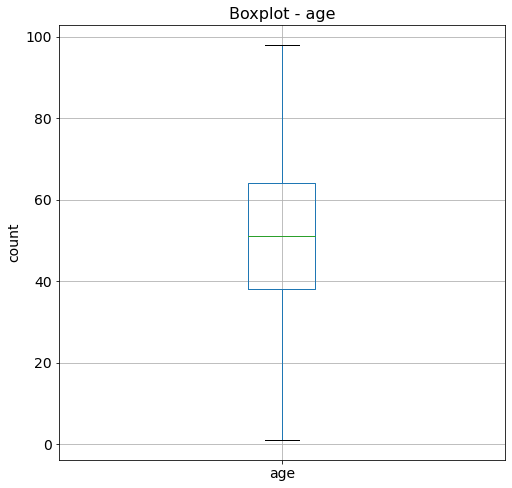

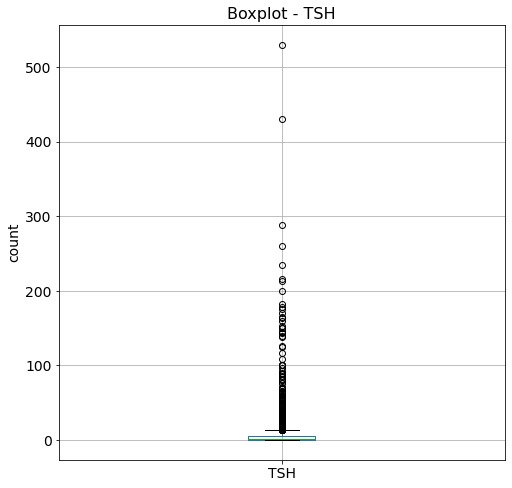

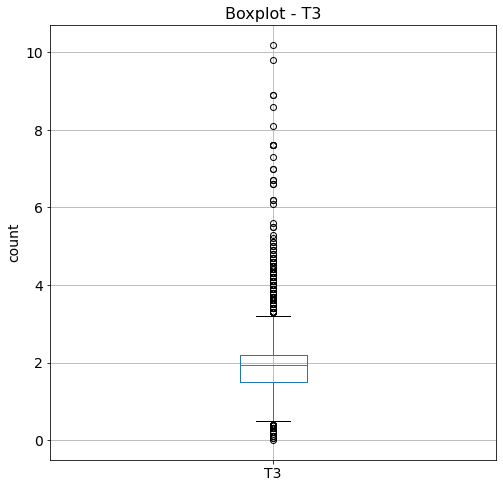

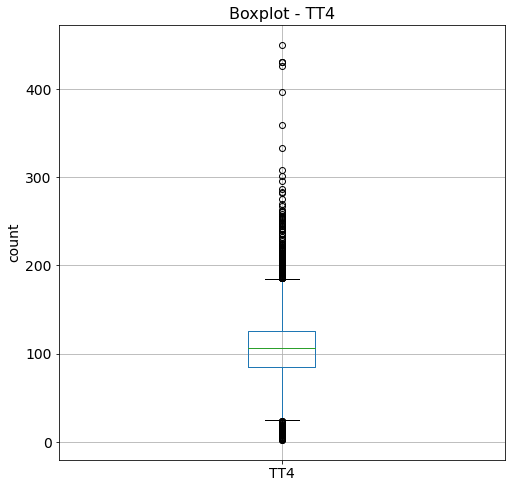

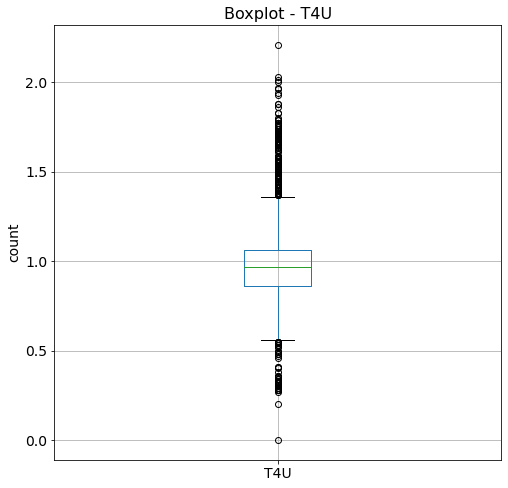

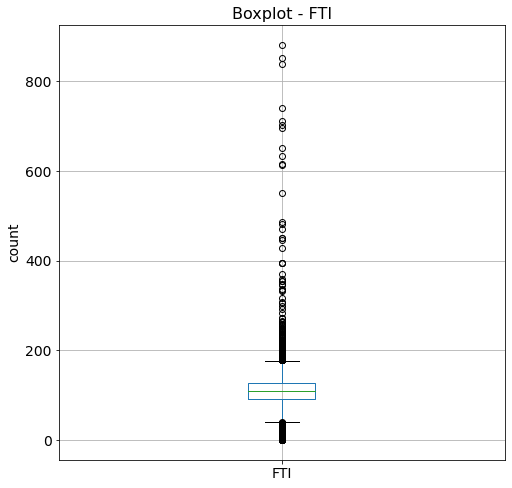

In [16]:
# Checking for Outliers

for column in numna:
    plt.figure(figsize=(8,8))
    hypo.boxplot([column], fontsize= 14)
    plt.ylabel('count', fontsize = 14)
    plt.title('Boxplot - {}'.format(column), fontsize = 16)

# All the numeric columns except for age have outliers. 

In [17]:
# Determining how many rows would be lost if outliers were removed

# Calculating our first, third quantiles and then later our IQR
# ---
Q1 = hypo.quantile(0.25)
Q3 = hypo.quantile(0.75)
IQR = Q3 - Q1

# Removing outliers based on the IQR range
# ---
# 
hypo_new = hypo[~((hypo < (Q1 - 1.5 * IQR)) | (hypo > (Q3 + 1.5 * IQR))).any(axis=1)]

# Printing the shape of our new dataset
# ---
# 
print(hypo_new.shape)

# Printing the shape of our old dataset
# ---
#
print(hypo.shape)

# Number of rows removed

rows_removed = hypo.shape[0] - hypo_new.shape[0]
print('Number of rows removed:', rows_removed)

# Percentage of rows removed of the percentage
row_percent = (rows_removed/hypo.shape[0]) * 100
print('Percentage of rows removed:', row_percent)

# There will be no need to remove the outliers since it 
# doesn't seem like there are obvious errors in the data.
# Furthermore, removing outliers will reduce the diversity of the dataset 

(2352, 25)
(3007, 25)
Number of rows removed: 655
Percentage of rows removed: 21.78250748254074


## 6. Exploratory Data Analysis

### a) Univariate Analysis

In [18]:
# Previewing the columns

hypo.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured'],
      dtype='object')

In [19]:
# Replacing the codes for better understanding of graphs

hypo = hypo.replace(['t','f','M','F','y','n'], ['True','False','Male','Female','Yes','No'])
hypo.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured
0,hypothyroid,72.0,Male,False,False,False,False,False,False,False,False,False,False,False,Yes,30.0,Yes,0.6,Yes,15.0,Yes,1.48,Yes,10.0,No
1,hypothyroid,15.0,Female,True,False,False,False,False,False,False,False,False,False,False,Yes,145.0,Yes,1.7,Yes,19.0,Yes,1.13,Yes,17.0,No
2,hypothyroid,24.0,Male,False,False,False,False,False,False,False,False,False,False,False,Yes,0.0,Yes,0.2,Yes,4.0,Yes,1.00,Yes,0.0,No
3,hypothyroid,24.0,Female,False,False,False,False,False,False,False,False,False,False,False,Yes,430.0,Yes,0.4,Yes,6.0,Yes,1.04,Yes,6.0,No
4,hypothyroid,77.0,Male,False,False,False,False,False,False,False,False,False,False,False,Yes,7.3,Yes,1.2,Yes,57.0,Yes,1.28,Yes,44.0,No


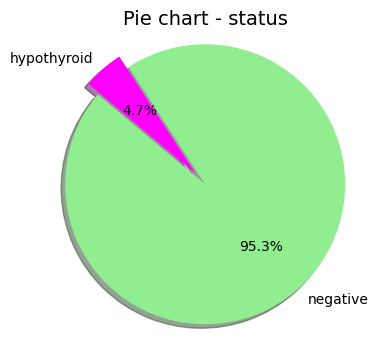

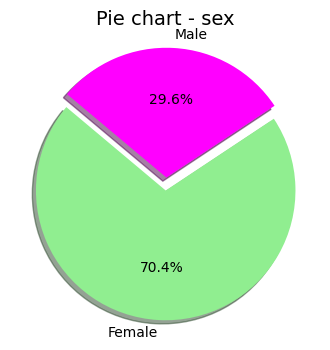

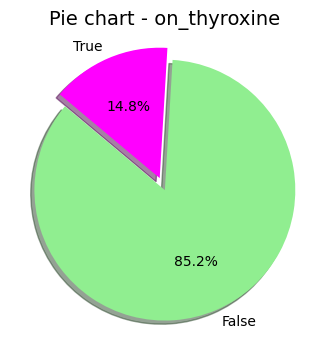

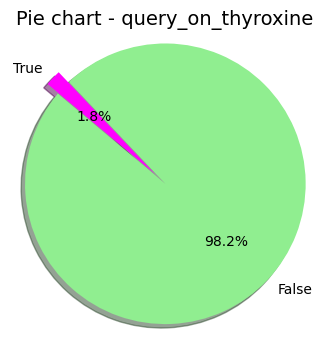

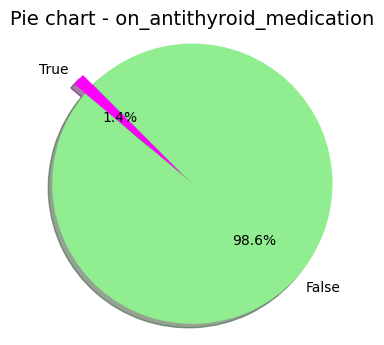

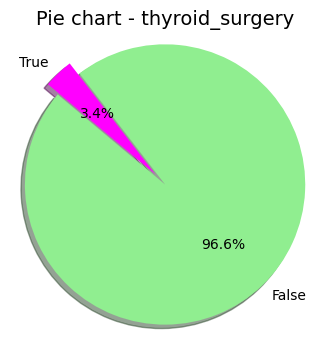

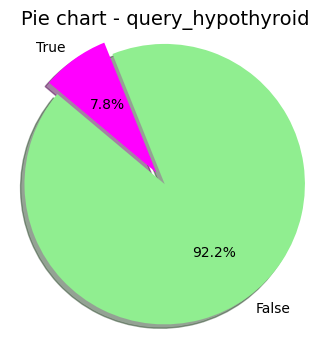

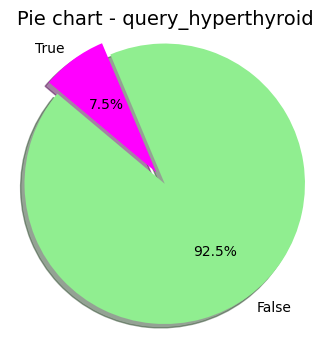

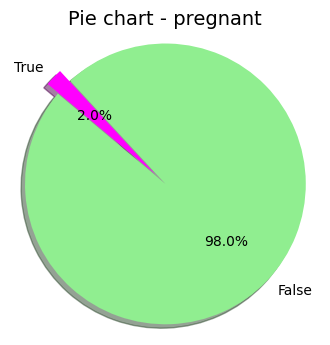

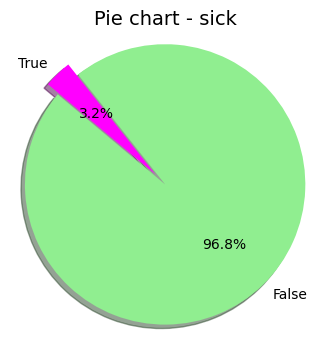

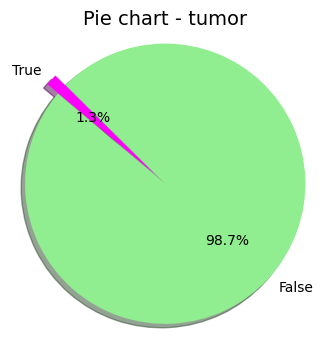

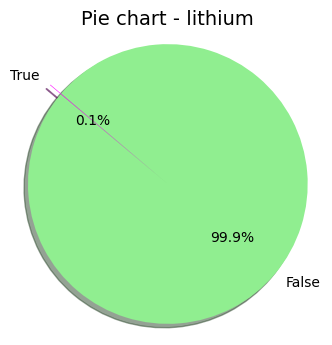

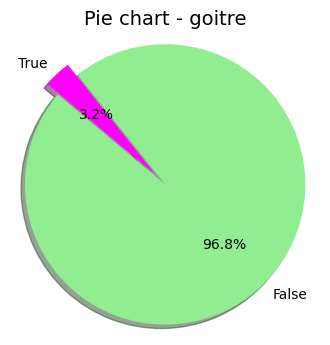

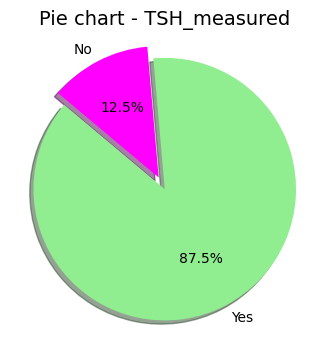

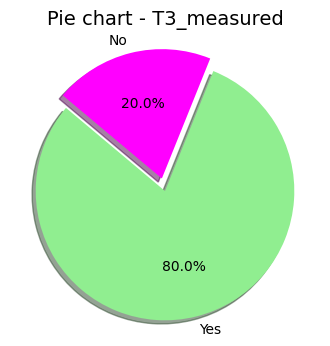

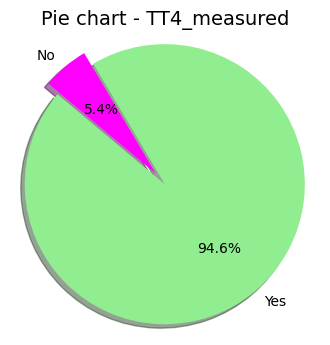

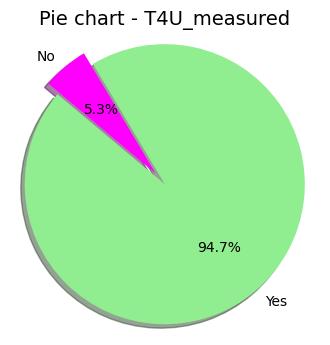

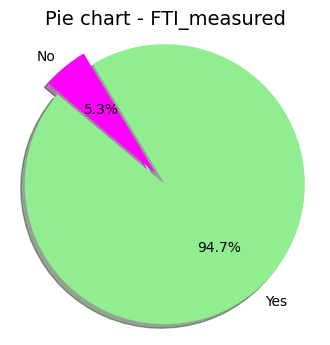

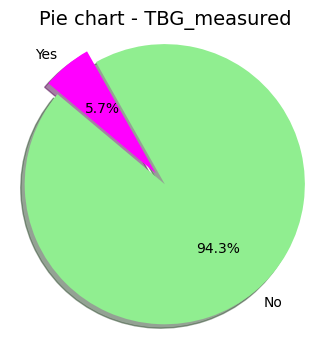

In [20]:
# Pie charts for the categorical columns

for i in qcol:
  cross = hypo[i].value_counts()
  plt.figure(figsize= (4,4), dpi=100)

  # Highlighting yes
  explode = (0.1, 0)  
  colors = ['lightgreen', 'magenta']

  # Plotting our pie chart
  cross.plot.pie(explode = explode, colors = colors, autopct='%1.1f%%', shadow=True, startangle=140)

  plt.axis('equal')
  plt.title('Pie chart - {}'.format(i), fontsize=14)
  plt.ylabel('')
  plt.show()
  print(' ')

From the pie chart we can make the following observations:
Of the total number of respondents

- 4.7% have hypothyroidism, 70.4% are negative
- 29.6% are female, 70.4% are male
- 4.8% are on thyroxine, 85.2% are not
- 1.4% are on antithyroid medication, 9.8% are not.
- 3.4% have undergone thyroid surgery, 96.6% have not
- 2% are pregnant, 98% are not
- 3.2% are sick, 96.8% are not
- 1.3% have a tumor, 98.7% do not
- 0.1% have traces if lithium, 99.9% do not.
- 3.2% have goitre the rest do not
- 87.5% have had their TSH measured
- 80% have had T3 measured
- 94.6% have had TT4 measured
- 94.7 have had their T4U and FTI measured
- 5.7% have had their TBC measured

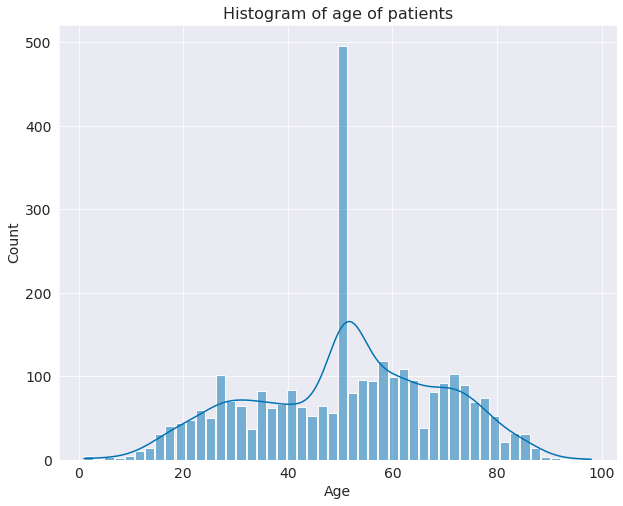

In [21]:
# Histogram on age to see the shape of the distribution

def histogram(var1, bins):
  plt.figure(figsize= (10,8)),
  sns.set_style('darkgrid'),
  sns.set_palette('colorblind'),
  sns.histplot(x = var1, data=hypo,  bins = bins , shrink= 0.9, kde = True)

histogram('age', 50)
plt.title('Histogram of age of patients', fontsize = 16)
plt.xlabel('Age', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()



In [22]:
# Measures of central tendency

hypo['age'].describe()

# The mean age is 51 
# The maximum age is 98
# The minimum age is 1
# 25% of ages are below 38 while 50% of ages are below
# 51 and 75% of ages are below 64

count    3007.000000
mean       51.350030
std        17.864731
min         1.000000
25%        38.000000
50%        51.154214
75%        64.000000
max        98.000000
Name: age, dtype: float64

In [23]:
# Defining a variable to calculate variation

def variation(var):
  print('The skewness is:', hypo[var].skew())
  print('The kurtosis is:', hypo[var].kurt())
  print('The coefficient of variation is:', hypo[var].std()/hypo[var].mean())

# Checking on coefficent of variance, skewness and kurtosis

variation('age')

# The distribution is more or less normal and is platykurtic.
# There is low variance in the age of the different respondents

The skewness is: -0.19784403314342464
The kurtosis is: -0.6106397545900806
The coefficient of variation is: 0.34790107171854084


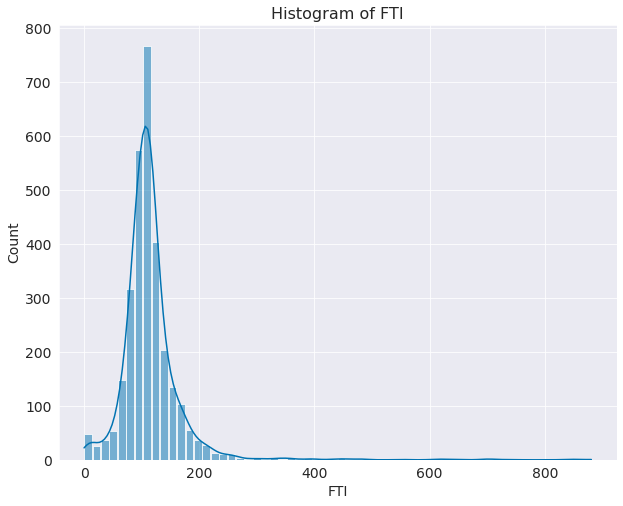

In [24]:
# Histogram of FTI

histogram('FTI', 60)
plt.title('Histogram of FTI', fontsize = 16)
plt.xlabel('FTI', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()


In [25]:
# Measures of central tendency

hypo['FTI'].describe()

# The mean FTI is 115.48 
# The maximum FTI value is 881
# The minimum FTI value is 0
# 25% of FTI values are below 92 while 50% of FTI values are below
# 109 and 75% of FTI values are below 126.

count    3007.000000
mean      115.484252
std        58.535310
min         0.000000
25%        92.000000
50%       109.000000
75%       126.000000
max       881.000000
Name: FTI, dtype: float64

In [26]:
# Checking on coefficent of variance, skewness and kurtosis

variation('FTI')

# The distribution is skewed to the right and is leptokurtic.
# There is low variance in the FTI values

The skewness is: 5.355677896502824
The kurtosis is: 51.3753220461645
The coefficient of variation is: 0.5068683341409796


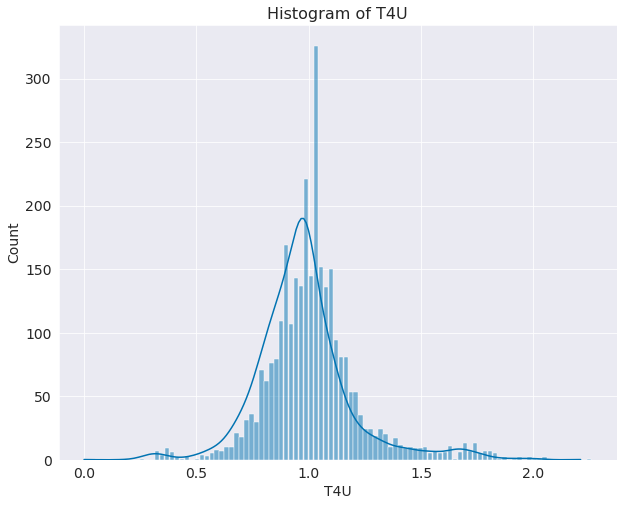

In [27]:
# Histogram of T4U values

histogram('T4U', 100)
plt.title('Histogram of T4U', fontsize = 16)
plt.xlabel('T4U', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

In [28]:
# Checking on coefficent of variance, skewness and kurtosis

variation('T4U')

# The distribution is slightly skewed to the right and is slightly leptokurtic.
# There is low variance in the T4U values

The skewness is: 0.9780648992093242
The kurtosis is: 3.7920396931769007
The coefficient of variation is: 0.22474041347095863


In [29]:
# Measures of central tendency

hypo['T4U'].describe()

# The mean value of T4U is 0.977
# The maximum value of T4U is 2.21
# The minimum value of T4U is 0
# 25% of T4U values are below 0.86 while 50% of T4U values are below
# 0.97 and 75% of T4U values are below 1.06.

count    3007.000000
mean        0.977593
std         0.219705
min         0.000000
25%         0.860000
50%         0.970000
75%         1.060000
max         2.210000
Name: T4U, dtype: float64

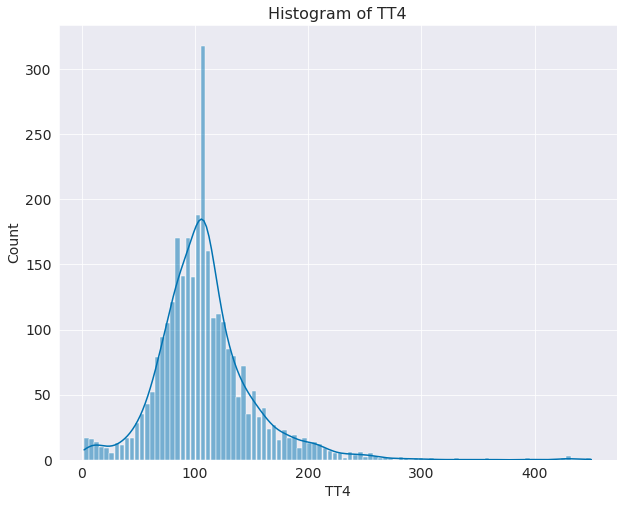

In [30]:
# Histogram of TT4 values

histogram('TT4', 100)
plt.title('Histogram of TT4', fontsize = 16)
plt.xlabel('TT4', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

In [31]:
# Checking measures of dispersion

variation('TT4')

# Distribution is slightly skewed to the right and leptokurtic
# The variation of TT4 values is low

The skewness is: 1.5082005775938354
The kurtosis is: 7.405392003957854
The coefficient of variation is: 0.39917110843961606


In [32]:
# Measures of central tendency

hypo['TT4'].describe()

# The mean value of TT4 is 108
# The maximum value of TT4 is 450
# The minimum value of TT4 is 2
# 25% of TT4 values are below 85 while 50% of TT4 values are below
# 106 and 75% of TT4 values are below 125.

count    3007.000000
mean      108.714583
std        43.395720
min         2.000000
25%        85.000000
50%       106.000000
75%       125.000000
max       450.000000
Name: TT4, dtype: float64

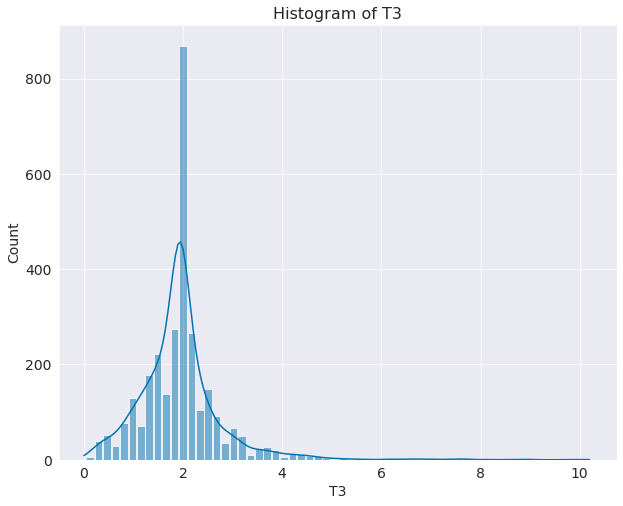

In [33]:
# Histogram of T3 values

histogram('T3', 60)
plt.title('Histogram of T3', fontsize = 16)
plt.xlabel('T3', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

In [34]:
# Getting measures of dispersion

variation('T3')

# Distribution is skewed to the right and is leptokurtic.
# There is low variance.

The skewness is: 2.4179957096881046
The kurtosis is: 14.419929959213274
The coefficient of variation is: 0.4528030514892959


In [35]:
# Measures of central tendency

hypo['T3'].describe()

# The mean value of T3 is 1.93
# The maximum value of T3 is 10
# The minimum value of T3 is 0
# 25% of T3 values are below 1.5 while 50% of T3 values are below
# 0.939 and 75% of T3 values are below 2.2.

count    3007.000000
mean        1.934882
std         0.876120
min         0.000000
25%         1.500000
50%         1.939749
75%         2.200000
max        10.200000
Name: T3, dtype: float64

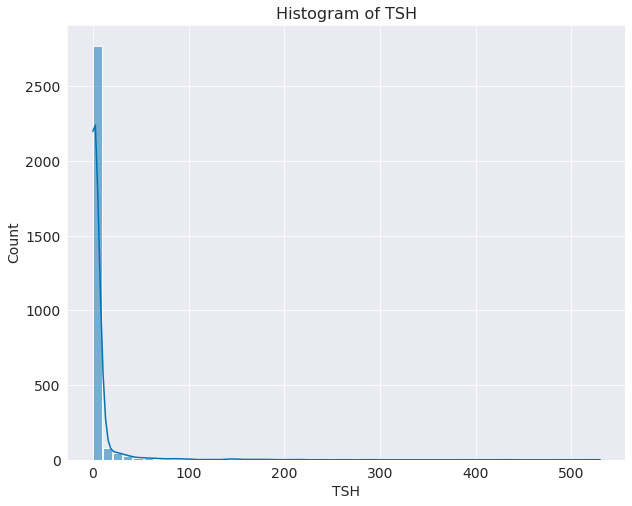

In [36]:
# Histogram of TSH values

histogram('TSH', 50)
plt.title('Histogram of TSH', fontsize = 16)
plt.xlabel('TSH', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

In [37]:
# Measures of dispersion

variation('TSH')

# Distribution is right skewed and leptokurtic
# There is high variance within the TSH values

The skewness is: 11.000065170998116
The kurtosis is: 175.9888075948102
The coefficient of variation is: 3.858570078768712


In [38]:
# Measures of central tendency

hypo['TSH'].describe()

# The mean value of TSH is 5.82
# The maximum value of TSH is 530
# The minimum value of TSH is 0
# 25% of TSH values are below 0 while 50% of TSH values are below
# 1 and 75% of TSH values are below 5.3.

count    3007.000000
mean        5.823557
std        22.470602
min         0.000000
25%         0.000000
50%         1.000000
75%         5.300000
max       530.000000
Name: TSH, dtype: float64

### b) Bivariate Analysis

In [39]:
# Preview of the coluns

hypo.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured'],
      dtype='object')

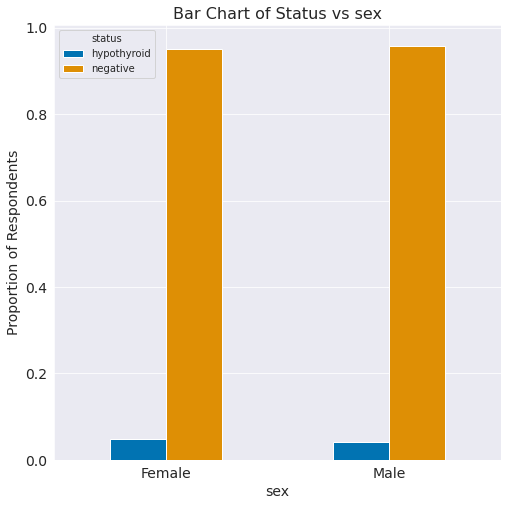

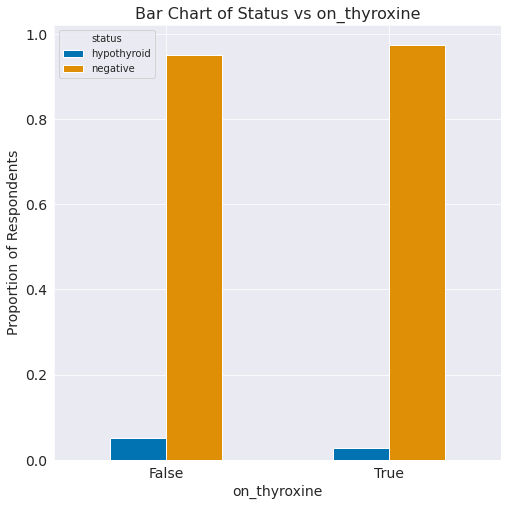

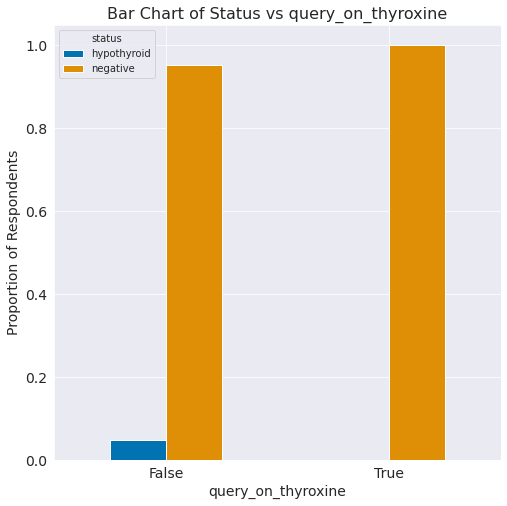

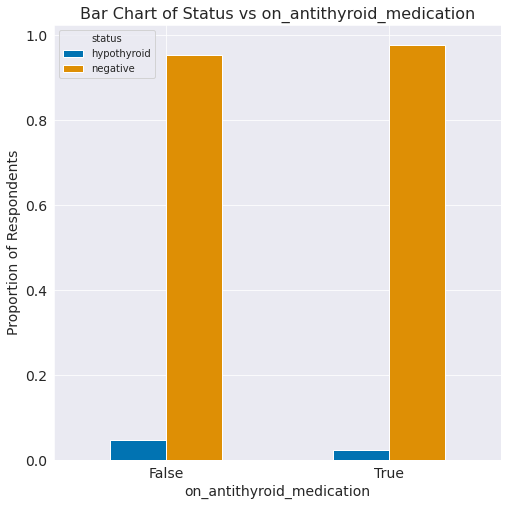

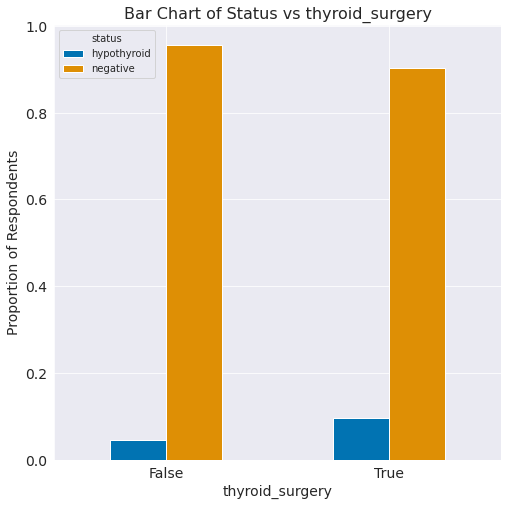

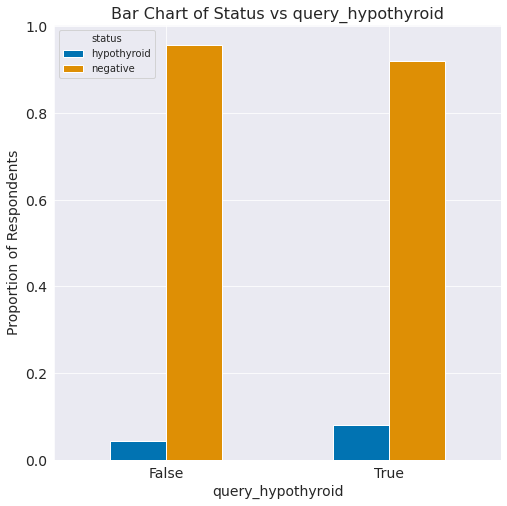

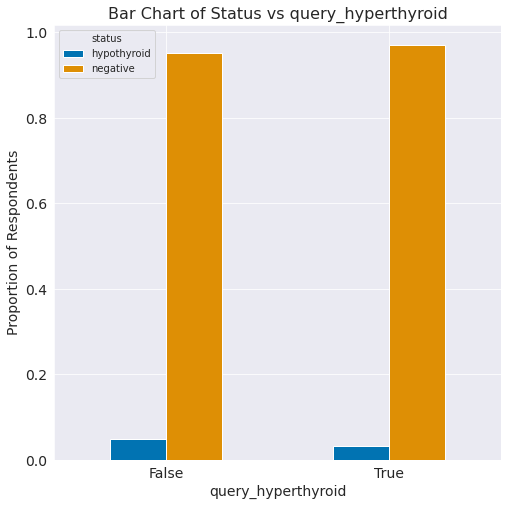

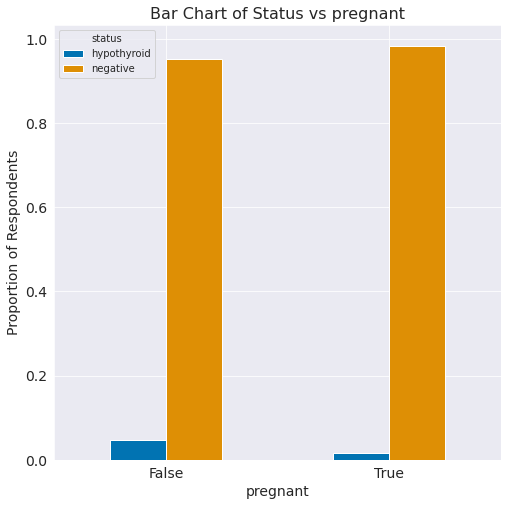

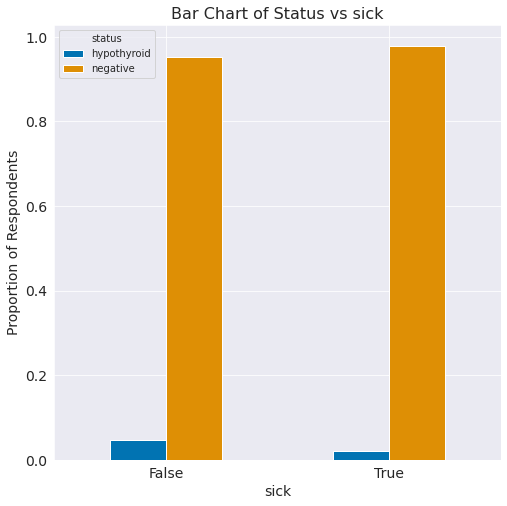

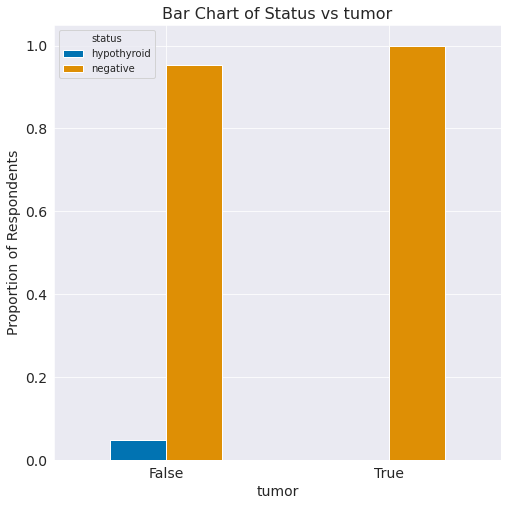

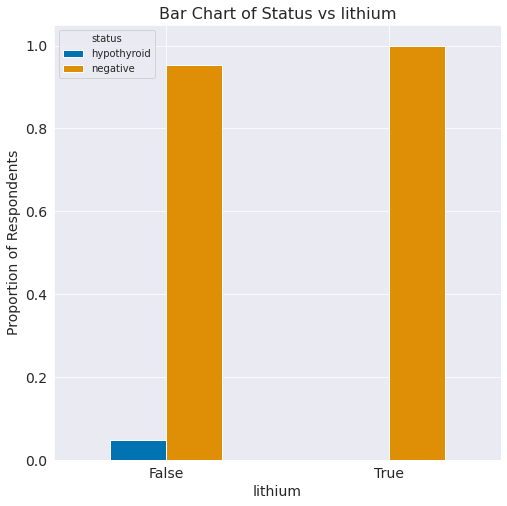

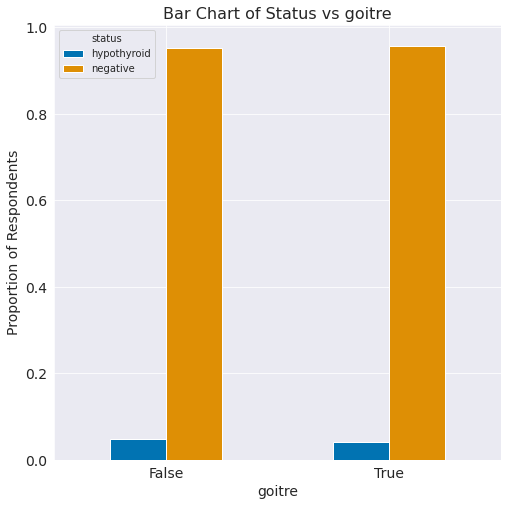

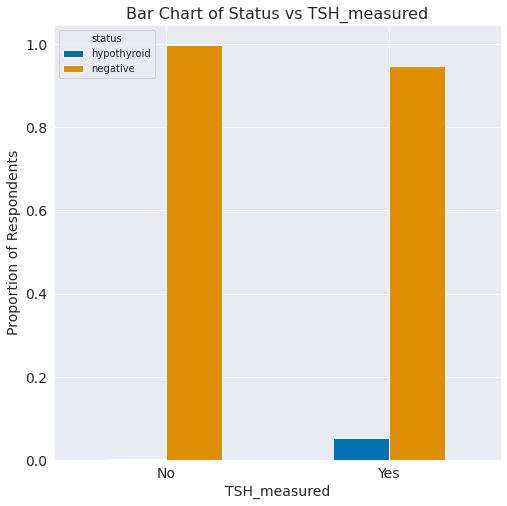

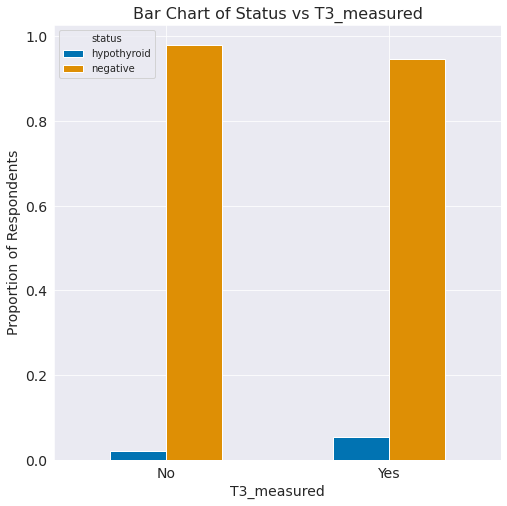

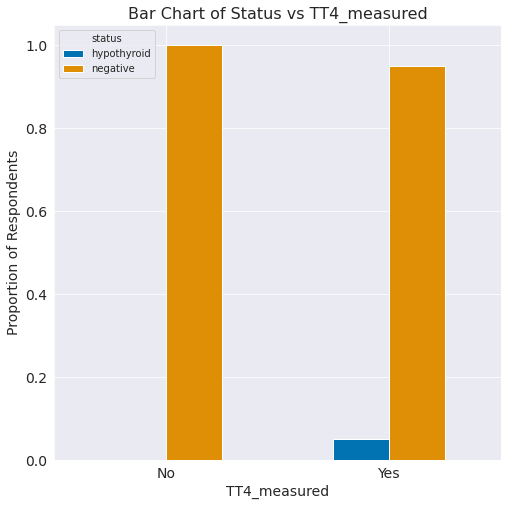

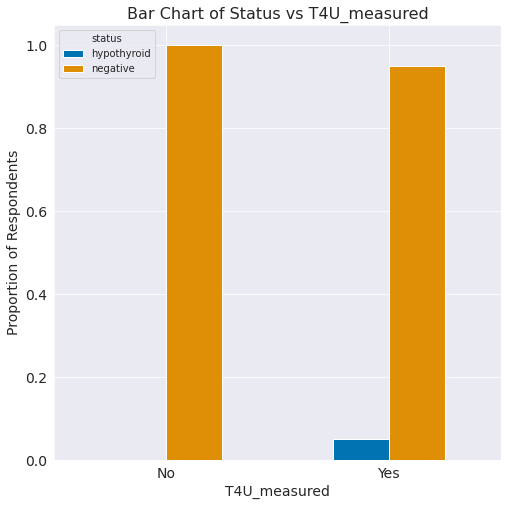

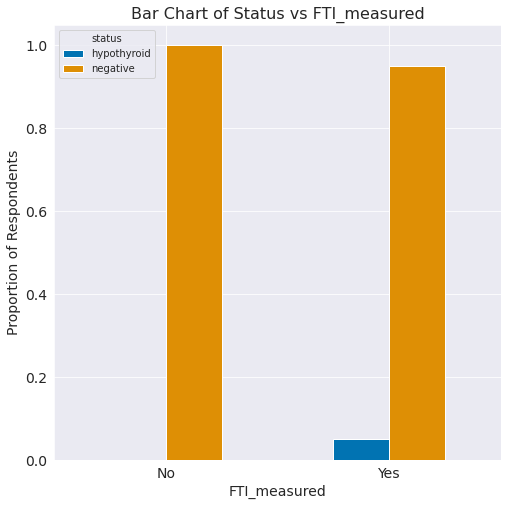

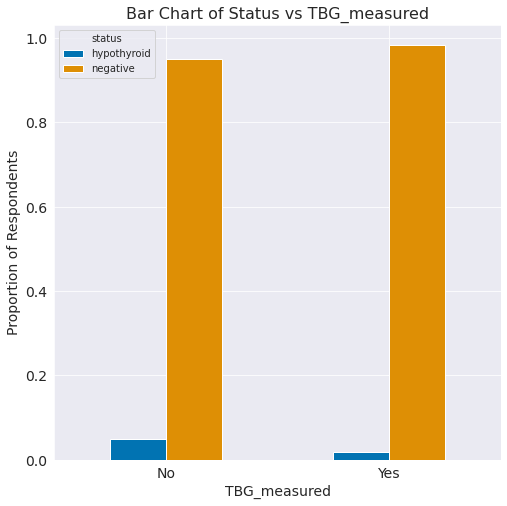

In [40]:
# Bar charts to compare the whether a person has hypothyroid vs the different categorical variables 
qcol1 =['sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'T3_measured', 'TT4_measured',
       'T4U_measured', 'FTI_measured', 'TBG_measured']

for i in qcol1:
  table=pd.crosstab(hypo[i],hypo['status'])
  table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', figsize = (8,8), stacked=False)
  plt.title('Bar Chart of Status vs {}'.format(i), fontsize = 16)
  plt.xlabel(i, fontsize = 14)
  plt.ylabel('Proportion of Respondents', fontsize = 14)
  plt.xticks(rotation = 360, fontsize = 14)
  plt.yticks(fontsize = 14)
  plt.show()
  print(' ')
  print(' ')


The observations made from the graphs above are:

- The proportion of males that have hypothyroidism is not different from the number of females that have hypothyroidism. The same is seen for those who have goitre and those who don't.
- Those who are not on thyroxine have a higher proportion of respondents with hypothyroidism. Those who query have no respondent recording hypothyroidism.
- Of those who had their FTI, T4U, TT4, and TSH measured less than 0.1% of the respondents have hypothyroidism. Of those who haven't, none of them have hypothyroidism.
- Those who have not had their TBG measured have a higher proportion of respondents recording hypothyroidism than those who have not had TBG measured.
- Those who have not had T3 measured have a smaller proportion of respondents recorded with hypothyroidism than those who have.
- Those who do not have Lithium and those who do not have tumors have a proportion of respondents recorded with hypothyroidism.
- A higher proportion of respondents not on antithyroid medication have hypothyroidism than those who aren't.
- A higher proportion of those who have undergone thyroid surgery have hypothyroidism than those who have not undergone surgery.
- Those who query on hypothyroid have a higher proportion of respondents with hypothyroidism than those who do not query.
- However, those who do not query on hyperthyroid have a higher proportion of respondents with hypothyroidism than those who query.
- Those who are not pregnant have a higher proportion of respondents with hypothyroid than those who are pregnant.

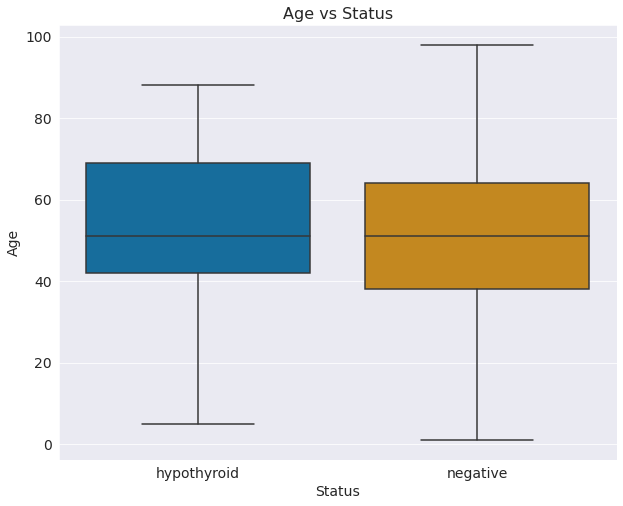

In [41]:
# Comparing age and status

plt.figure(figsize=(10,8))
sns.boxplot(x = hypo['status'], y= hypo['age'])
plt.title('Age vs Status', fontsize = 16)
plt.xlabel('Status', fontsize = 14)
plt.ylabel('Age', fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

# Respondents with hypothyroidism are aged between 5 and 90 with 75% being under
# 70 years. Respondents are aged between 1 and 98 years old.

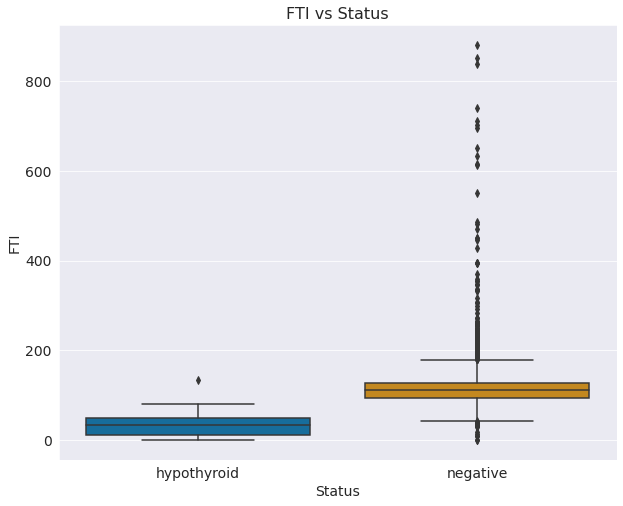

In [42]:
# Comparing status and FTI 

plt.figure(figsize=(10,8))
sns.boxplot(x = hypo['status'], y= hypo['FTI'])
plt.title('FTI vs Status', fontsize = 16)
plt.xlabel('Status', fontsize = 14)
plt.ylabel('FTI', fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

# Those with hypothyroidism have low FTI compared to those without hypothyroidism. 
# Low FTI normally indicates the presence of primary hypothyroidism

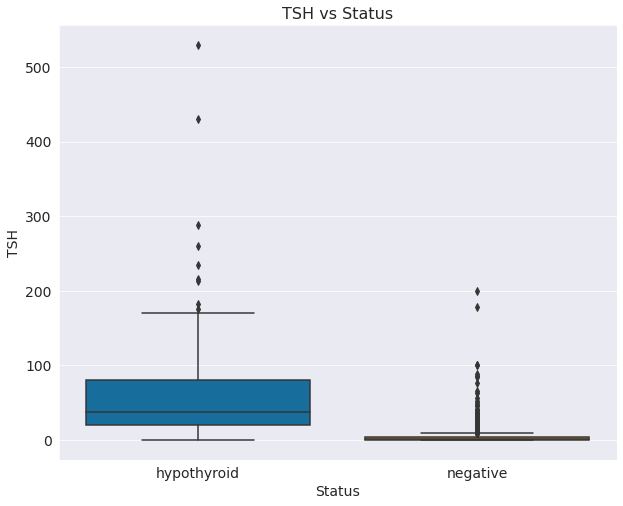

In [43]:
# Comparing status and TSH 

plt.figure(figsize=(10,8))
sns.boxplot(x = hypo['status'], y= hypo['TSH'])
plt.title('TSH vs Status', fontsize = 16)
plt.xlabel('Status', fontsize = 14)
plt.ylabel('TSH', fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

# Those with hypothyroidism have high TSH levels as compared to those without hypothyroidism.
# High TSH levels are an indicator of primary hypothyroidism

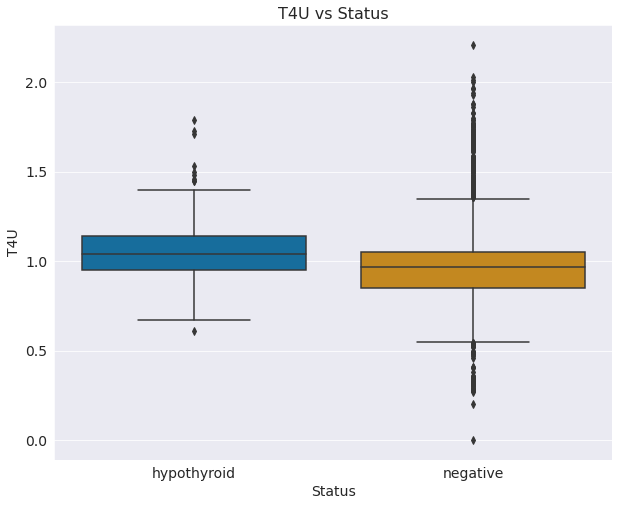

In [44]:
# Comparing status and T4U 

plt.figure(figsize=(10,8))
sns.boxplot(x = hypo['status'], y= hypo['T4U'])
plt.title('T4U vs Status', fontsize = 16)
plt.xlabel('Status', fontsize = 14)
plt.ylabel('T4U', fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

# The median T4U value for those with hypothyroidism is higher than the median
# T4U value for those without hypothyroidism

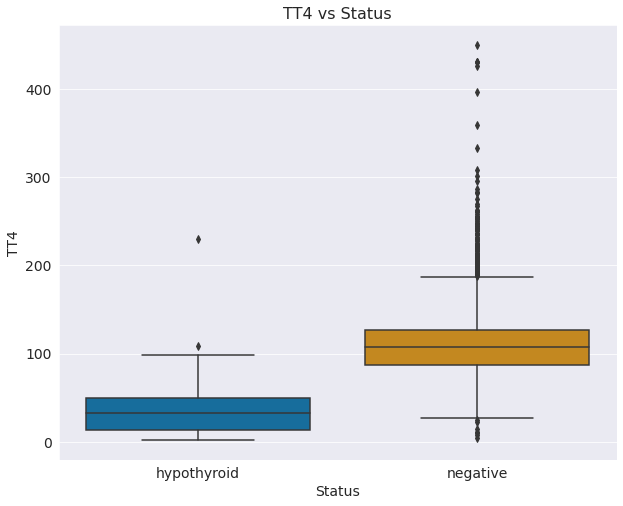

In [45]:
# Comparing status and TT4 

plt.figure(figsize=(10,8))
sns.boxplot(x = hypo['status'], y= hypo['TT4'])
plt.title('TT4 vs Status', fontsize = 16)
plt.xlabel('Status', fontsize = 14)
plt.ylabel('TT4', fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

# Those with hypothyroidism have low TT4 levels as compared to those without hypothyroidism
# Low TT4 levels is expected from those with hypothyroidism.

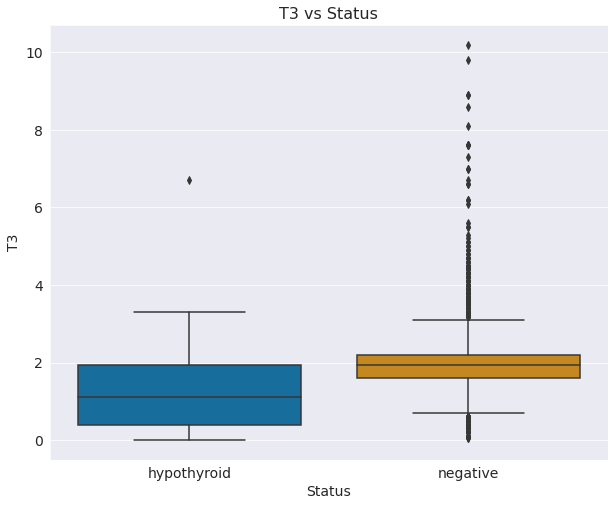

In [46]:
# Comparing status and T3 

plt.figure(figsize=(10,8))
sns.boxplot(x = hypo['status'], y= hypo['T3'])
plt.title('T3 vs Status', fontsize = 16)
plt.xlabel('Status', fontsize = 14)
plt.ylabel('T3', fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

# Respondents with hypothyroidism recorded lower T3 than those who are negative

### c) Multivariate Analysis 

In [47]:
# Getting a preview of the columns again

hypo.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured'],
      dtype='object')

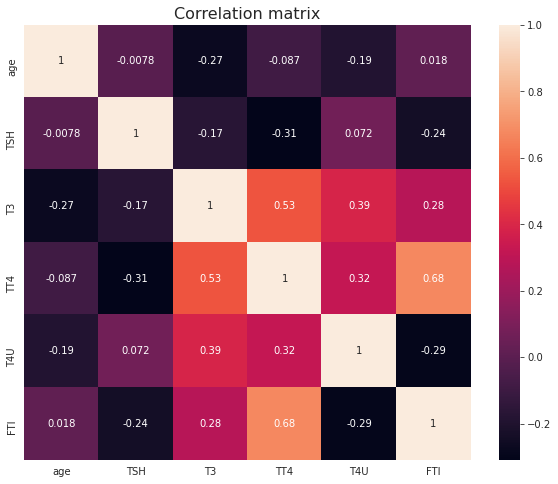

In [48]:
# Correlation Heatmap for numerical features

plt.figure(figsize=(10,8)) 
sns.heatmap(hypo.corr(),annot=True)
plt.title('Correlation matrix', fontsize = 16) 
plt.show()

# There is some correlations between TT4 and FTI, T4U and TT4 and TT4 and T3.

## 7. Testing for multicollinearity
> Multicollinearity is the occurrence of high intercorrelations among 2 or more independent variables in a model with multiple features.

> Testing for multicollinearity is extremely important because it can lead to:

* Inaccurate estimates of the regression coefficients
* Inflation of the standard errors of the regression coefficients
* False and non-significant p-values
* Degredation of the predictability of the model

>In this case, I will only test for multicollinearity for the sake of the data that will be used in the SVM model. This is because the impact of multicollinearity in the Multiple Linear Regression is similar to that on the SVM linear kernel.

> Decision Trees and boosted tree algorithms like AdaBoost and Gradient Boost are immune to multicollinearity by nature. When they decide to split, the tree will choose only one of the perfectly correlated features. Hence, I will make a copy of the dataset but without dropping any features.

In [49]:
# Encoding the categorical columns

for i in qcol:
  hypo[i] = hypo[i].astype('category')
  hypo[i] = hypo[i].cat.codes

# Confirming the changes

print(hypo['status'].unique())
print(' ')
print(hypo.dtypes)

[0 1]
 
status                          int8
age                          float64
sex                             int8
on_thyroxine                    int8
query_on_thyroxine              int8
on_antithyroid_medication       int8
thyroid_surgery                 int8
query_hypothyroid               int8
query_hyperthyroid              int8
pregnant                        int8
sick                            int8
tumor                           int8
lithium                         int8
goitre                          int8
TSH_measured                    int8
TSH                          float64
T3_measured                     int8
T3                           float64
TT4_measured                    int8
TT4                          float64
T4U_measured                    int8
T4U                          float64
FTI_measured                    int8
FTI                          float64
TBG_measured                    int8
dtype: object


In [50]:
# Creating a copy of the dataset to use in decision tree

hypotree = hypo.copy()
hypotree.head(2)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured
0,0,72.0,1,0,0,0,0,0,0,0,0,0,0,0,1,30.0,1,0.6,1,15.0,1,1.48,1,10.0,0
1,0,15.0,0,1,0,0,0,0,0,0,0,0,0,0,1,145.0,1,1.7,1,19.0,1,1.13,1,17.0,0


In [51]:
hypo.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured'],
      dtype='object')

In [52]:
# Specifying X and y

features = ['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured']

X = hypo[features]
y = hypo['status']

In [53]:
# Checking for multicollinearity

correlations = X.corr()
correlations

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured
age,1.000000,0.002559,-0.005034,-0.021795,-0.061838,-0.015037,0.039948,-0.088436,-0.161615,0.061513,-0.066068,-0.022171,-0.039419,0.188714,-0.007766,0.162288,-0.269517,0.100271,-0.087480,0.097385,-0.191304,0.098060,0.018105,-0.103484
sex,0.002559,1.000000,-0.124784,0.052969,-0.021219,-0.045884,-0.066456,-0.058236,-0.093226,0.021954,-0.005253,-0.016714,-0.092020,0.002560,-0.035097,0.077782,-0.074329,0.053735,-0.170400,0.052934,-0.199571,0.055384,-0.075510,-0.056019
on_thyroxine,-0.005034,-0.124784,1.000000,-0.015066,-0.025749,0.029442,0.063253,-0.087372,-0.000316,-0.065599,-0.023953,-0.010766,-0.027231,0.047435,-0.005348,-0.191533,0.023863,0.024439,0.217741,0.023892,0.071352,0.027524,0.113612,-0.030264
query_on_thyroxine,-0.021795,0.052969,-0.015066,1.000000,-0.016246,0.015229,-0.021251,-0.039004,-0.019641,-0.024921,0.049138,-0.003521,0.003723,-0.128473,-0.014464,-0.099341,-0.014861,0.032465,-0.020323,0.032359,-0.034770,0.032252,-0.004649,-0.033621
on_antithyroid_medication,-0.061838,-0.021219,-0.025749,-0.016246,1.000000,-0.006834,-0.034654,0.126889,0.002975,-0.021730,-0.013819,-0.003070,-0.021497,-0.040680,-0.000977,-0.025550,0.065709,-0.072398,-0.002692,-0.072788,0.026532,-0.073180,-0.017826,0.068306
thyroid_surgery,-0.015037,-0.045884,0.029442,0.015229,-0.006834,1.000000,-0.000338,0.022317,-0.014130,-0.034384,-0.021867,-0.004859,-0.023563,0.026972,0.012127,-0.001892,-0.007009,-0.012063,-0.016125,-0.012378,0.026097,-0.012695,-0.026121,0.008727
query_hypothyroid,0.039948,-0.066456,0.063253,-0.021251,-0.034654,-0.000338,1.000000,-0.017542,-0.015531,-0.053159,-0.033807,0.040546,-0.024256,0.035154,0.066924,-0.040374,-0.038914,0.014213,-0.010978,0.013823,0.044432,0.013432,-0.046316,-0.018364
query_hyperthyroid,-0.088436,-0.058236,-0.087372,-0.039004,0.126889,0.022317,-0.017542,1.000000,0.074962,-0.052171,-0.033179,-0.007372,0.041946,-0.143157,-0.023062,-0.033462,0.172314,-0.105387,0.133414,-0.106121,0.071292,-0.106860,0.064331,0.119341
pregnant,-0.161615,-0.093226,-0.000316,-0.019641,0.002975,-0.014130,-0.015531,0.074962,1.000000,-0.026272,0.003883,-0.003712,0.081900,-0.002656,-0.012414,0.024727,0.201944,-0.018170,0.171295,-0.018437,0.323426,-0.018705,-0.005423,0.015347
sick,0.061513,0.021954,-0.065599,-0.024921,-0.021730,-0.034384,-0.053159,-0.052171,-0.026272,1.000000,-0.021199,-0.004710,-0.032977,0.040567,-0.006288,0.072422,-0.103513,0.018341,-0.042186,0.018124,-0.047742,0.017907,-0.023502,-0.020655


In [54]:
# Creating the VIF dataframe

VIF = pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns = correlations.columns)
VIF

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured
age,1.169580,0.044864,0.010671,-0.005149,0.039999,0.023273,-0.036887,0.027549,0.119595,-0.020782,0.061370,0.023263,-0.004295,-0.156051,0.024013,-0.126359,0.299469,-0.406524,-0.110790,0.762387,0.102572,-0.281958,-0.004949,0.028716
sex,0.044864,1.109025,0.091032,-0.039687,0.023753,0.045267,0.055984,0.051821,0.028662,0.003108,0.029437,0.013417,0.087042,0.074641,0.047930,-0.069028,-0.077060,-0.188828,-0.020155,0.613287,0.287998,-0.460232,0.205169,0.027265
on_thyroxine,0.010671,0.091032,1.182482,0.023911,0.009688,-0.027608,-0.031512,0.110090,0.017234,0.064533,0.029457,0.011524,0.039524,-0.200893,-0.077357,0.347930,0.099089,-0.179193,-0.461234,0.821695,0.098451,-0.618100,0.170286,0.088547
query_on_thyroxine,-0.005149,-0.039687,0.023911,1.053659,0.006124,-0.028593,0.017476,0.049119,-0.000317,0.022154,-0.039419,-0.000306,-0.011151,0.227935,0.011714,0.081887,0.006249,-0.209872,-0.029447,-0.096075,0.042190,0.238250,0.043177,0.147965
on_antithyroid_medication,0.039999,0.023753,0.009688,0.006124,1.030903,0.015951,0.034485,-0.118546,0.020355,0.013301,0.016945,0.004117,0.042813,-0.033449,0.005746,0.007478,-0.070400,-0.031762,0.052143,0.072323,-0.004436,0.079409,0.012622,0.042249
thyroid_surgery,0.023273,0.045267,-0.027608,-0.028593,0.015951,1.011519,0.010805,-0.032742,0.027227,0.033507,0.023801,0.007443,0.030255,-0.068089,0.006187,0.004691,0.008342,-0.026333,0.053312,0.073882,-0.045510,0.029144,-0.015800,0.027026
query_hypothyroid,-0.036887,0.055984,-0.031512,0.017476,0.034485,0.010805,1.029653,0.000761,0.019161,0.056113,0.031505,-0.040413,0.027922,-0.056412,-0.058137,0.078292,0.034378,-0.073827,-0.043926,0.047794,-0.020125,0.094380,0.060899,0.081381
query_hyperthyroid,0.027549,0.051821,0.110090,0.049119,-0.118546,-0.032742,0.000761,1.099211,-0.039442,0.042455,0.043078,0.009202,-0.009458,0.161002,-0.031652,-0.069521,-0.118602,-0.156535,-0.203192,0.166973,0.093438,-0.142218,0.112968,-0.165378
pregnant,0.119595,0.028662,0.017234,-0.000317,0.020355,0.027227,0.019161,-0.039442,1.155754,0.005570,0.010157,0.020957,-0.057596,-0.011083,0.021750,-0.073696,-0.023573,-0.118605,0.054063,0.194681,-0.394317,0.028701,-0.135275,0.068935
sick,-0.020782,0.003108,0.064533,0.022154,0.013301,0.033507,0.056113,0.042455,0.005570,1.028773,0.021848,0.002332,0.025814,-0.000963,0.008872,-0.060225,0.110334,-0.020718,-0.079720,0.064721,0.026012,-0.000361,0.048794,0.026658


In [55]:
# Extracting the VIF values

pd.Series(np.diag(VIF), index=[VIF.columns])

# There are four columns with a VIF value greater than 4 and need further investigation

age                            1.169580
sex                            1.109025
on_thyroxine                   1.182482
query_on_thyroxine             1.053659
on_antithyroid_medication      1.030903
thyroid_surgery                1.011519
query_hypothyroid              1.029653
query_hyperthyroid             1.099211
pregnant                       1.155754
sick                           1.028773
tumor                          1.042850
lithium                        1.005109
goitre                         1.041601
TSH_measured                   2.222583
TSH                            1.194404
T3_measured                    1.757195
T3                             1.691635
TT4_measured                 153.479385
TT4                            4.870287
T4U_measured                 308.512870
T4U                            3.007797
FTI_measured                 168.017558
FTI                            4.244418
TBG_measured                  12.972309
dtype: float64

In [56]:
# Dropping the T4U_measured column as it has the highest VIF value and is acctually correlated
# with the other 3 columns that have high VIF

X.drop('T4U_measured', axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [57]:
# Checking VIF score again

correlations = X.corr()
correlations

VIF = pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns = correlations.columns)

# Obtaining the VIF values
pd.Series(np.diag(VIF), index=[VIF.columns])

age                           1.167696
sex                           1.107806
on_thyroxine                  1.180293
query_on_thyroxine            1.053629
on_antithyroid_medication     1.030886
thyroid_surgery               1.011502
query_hypothyroid             1.029645
query_hyperthyroid            1.099121
pregnant                      1.155632
sick                          1.028760
tumor                         1.028364
lithium                       1.005100
goitre                        1.041553
TSH_measured                  2.222574
TSH                           1.194319
T3_measured                   1.757170
T3                            1.691409
TT4_measured                 77.987268
TT4                           4.869467
T4U                           3.006688
FTI_measured                 89.299234
FTI                           4.243068
TBG_measured                 12.972204
dtype: float64

In [58]:
# Dropping the FTI_measured colmn

X.drop('FTI_measured', axis=1, inplace=True)

# Checking VIF score again

correlations = X.corr()
correlations

VIF = pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns = correlations.columns)

# Obtaining the VIF values
pd.Series(np.diag(VIF), index=[VIF.columns])

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


age                           1.167577
sex                           1.107552
on_thyroxine                  1.179832
query_on_thyroxine            1.053226
on_antithyroid_medication     1.030736
thyroid_surgery               1.011452
query_hypothyroid             1.029488
query_hyperthyroid            1.099083
pregnant                      1.155451
sick                          1.028748
tumor                         1.018809
lithium                       1.005100
goitre                        1.041488
TSH_measured                  2.218159
TSH                           1.194175
T3_measured                   1.757039
T3                            1.691146
TT4_measured                 11.082032
TT4                           4.867034
T4U                           3.006681
FTI                           4.240725
TBG_measured                 11.240460
dtype: float64

In [59]:
# Dropping the TT4_measured column

X.drop('TT4_measured', axis=1, inplace=True)

# Checking VIF score again

correlations = X.corr()
correlations

VIF = pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns = correlations.columns)

# Obtaining the VIF values
pd.Series(np.diag(VIF), index=[VIF.columns])

# There is no more multicollinearity in the features

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


age                          1.167253
sex                          1.107530
on_thyroxine                 1.179592
query_on_thyroxine           1.052442
on_antithyroid_medication    1.029753
thyroid_surgery              1.011038
query_hypothyroid            1.029240
query_hyperthyroid           1.097695
pregnant                     1.154757
sick                         1.028609
tumor                        1.017222
lithium                      1.005098
goitre                       1.041222
TSH_measured                 2.201558
TSH                          1.193566
T3_measured                  1.755420
T3                           1.690731
TT4                          4.865812
T4U                          3.006237
FTI                          4.240716
TBG_measured                 1.788555
dtype: float64

## 8. Implementing the solution

### a) Building models using tree based algorithms



**Single decision tree**

In [60]:
# Specifying X and y for the decision tree and ensemble methods

X_tree = hypotree[features]
y_tree = hypotree['status']

In [61]:
# Splitting into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X_tree, y_tree, test_size= 0.25, random_state =99)

# Fitting the model
tree = DecisionTreeClassifier()

tree.fit(X_train, y_train)

# Making predictions

y_pred = tree.predict(X_test)

# Checking the accuracy

print('Prediction accuracy:', accuracy_score(y_train, tree.predict(X_train)))
print('Test accuracy:', accuracy_score(y_test, y_pred))

# The prediction accuracy in this case is a bit too high which could indicate overfitting.
# To try and fix this I will tune the hyperparameters

Prediction accuracy: 0.9995565410199556
Test accuracy: 0.9827127659574468


In [62]:
# Hyperparameter tuning using grid search

param_grid = {'min_samples_split': [3,4,5,6],
              'max_depth': [3,4,5,6, 7, 8, 9, 10],
              'min_samples_leaf': [2,3,4,5]}

search = GridSearchCV(estimator = tree, param_grid = param_grid, cv = 5, scoring = 'accuracy')

In [63]:
# Checking for the best parameters and accuracy score

search.fit(X_train, y_train)
print(search.best_params_)
print(search.best_score_)

{'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 3}
0.9924611973392461


In [64]:
# Fitting the model with the new parameters
tree = DecisionTreeClassifier(max_depth=3, min_samples_leaf=2, min_samples_split=3)

tree.fit(X_train, y_train)

# Making predictions

y_pred = tree.predict(X_test)

# Checking the accuracy

print('Prediction accuracy:', accuracy_score(y_train, tree.predict(X_train)))
print('Test accuracy:', accuracy_score(y_test, y_pred))

# Using 1 decision tree, the test accuracy is 98.6%

Prediction accuracy: 0.9942350332594235
Test accuracy: 0.9867021276595744


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


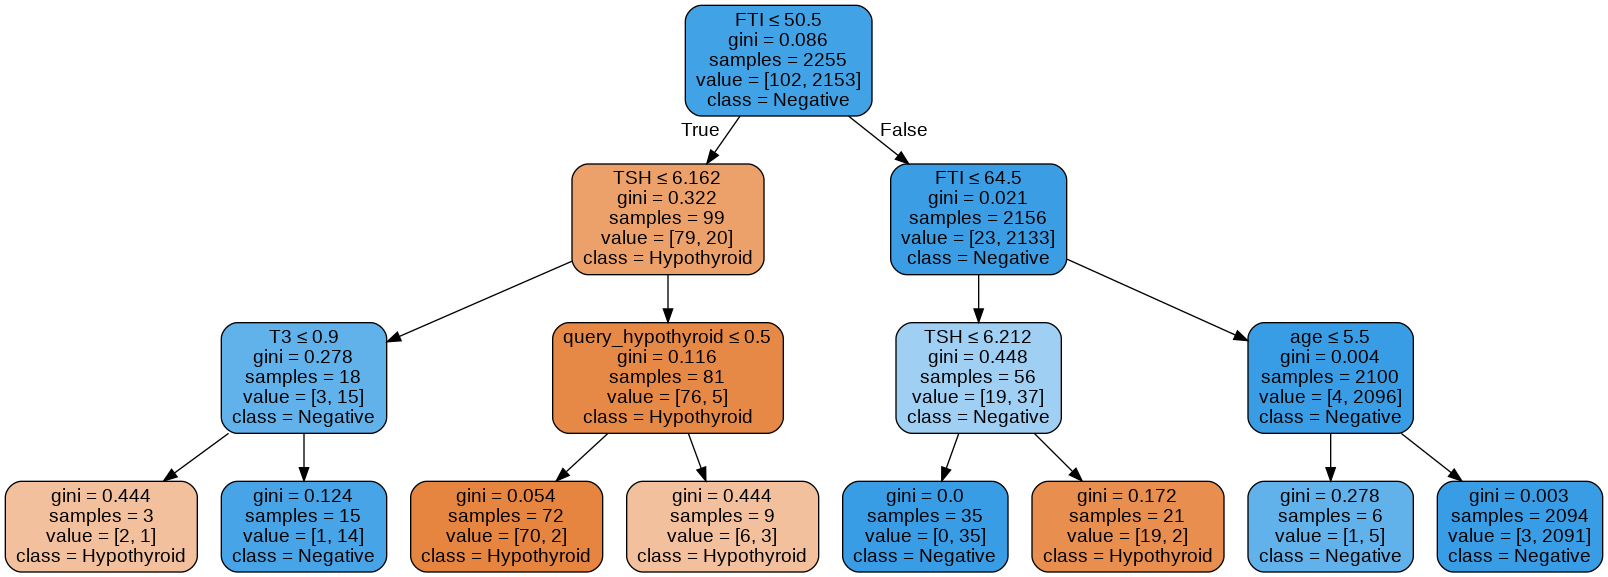

In [65]:
# Visualizing the decision tree

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = features,class_names=['Hypothyroid', 'Negative'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

# From this tree, we can see that FTI was considered the most important
# feature of all of them as it was put as the root node.
# Of all the features, only FTI, TSH, age, query_hypothyroid and T3 were considered.

**Ada Boost**

Adaboost is combined with decision trees to optimize them. Adaboost only creates stumps(trees with a depth of 1). It gives a weight to each stump based on how well it handled the error.
The final prediction is the sum of the weighted predictions of all the stumps created.

In [66]:
# Checking if Adaboost does any better

ada_boost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3, min_samples_leaf=2, min_samples_split=3), 
                          n_estimators=300, random_state=20)

ada_boost.fit(X_train, y_train)
y_pred = ada_boost.predict(X_test)

# Obtaining the accuracy score

print('Prediction accuracy:', accuracy_score(y_train, ada_boost.predict(X_train)))
print('Test accuracy:', accuracy_score(y_test, y_pred))

# With the target number of trees being 300, adaboost's test
# accuracy dropped from 98.6 in decision trees to 98.1
# Attempting some hyperparameter tuning

Prediction accuracy: 0.9995565410199556
Test accuracy: 0.9813829787234043


In [67]:
# Hyperparameter tuning using grid search

param_grid = {'n_estimators': np.arange(100,300,50)}

search = GridSearchCV(estimator = ada_boost, param_grid = param_grid, cv = 5, scoring = 'accuracy')

In [68]:
# Checking for the best parameter and accuracy score

search.fit(X_train, y_train)
print(search.best_params_)
print(search.best_score_)

# The best parameter in this case is n_estimators = 150

{'n_estimators': 150}
0.9884700665188471


In [69]:
# Running adaboost with the target number of trees as 150

ada_boost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3, min_samples_leaf=2, min_samples_split=3), 
                          n_estimators = 150, random_state=20)

ada_boost.fit(X_train, y_train)
y_pred = ada_boost.predict(X_test)

# Obtaining the accuracy score

print('Prediction accuracy:', accuracy_score(y_train, ada_boost.predict(X_train)))
print('Test accuracy:', accuracy_score(y_test, y_pred))

Prediction accuracy: 0.9995565410199556
Test accuracy: 0.9827127659574468


With 150 being the target number of trees, the ada boost model accuracy is 98.2% which is lower than that of the individual decision tree which was at 98.6%

**Gradient Boosting**

Gradient boosting builds trees one at a time, where each new tree helps to correct errors made by the previous tree. Instead of a tree stump, gradient boost starts by making a single leaf.

In [70]:
# Building the model with gradient boosting

gbr = GradientBoostingClassifier()
gbr = gbr.fit(X_train, y_train)

y_pred = gbr.predict(X_test)

# Obtaining the accuracy

print('Prediction accuracy:', accuracy_score(y_train, gbr.predict(X_train)))
print('Test accuracy:', accuracy_score(y_test, y_pred))

# Without hyperparameter tuning, the gradient boosting gave an accuracy score of 98.5%
# which is higher than Adaboost

Prediction accuracy: 0.9995565410199556
Test accuracy: 0.9853723404255319


In [71]:
# Hyper parameter tuning
# Learning rate, max_depth and n_setimators are the most
# important parameters in Gradient Boosting. 
# Therefore those are the ones I will use.

param_grid = {'learning_rate': np.arange(0.1,1,0.1),
              'max_depth': [1,2,3,4,5],
              'n_estimators': np.arange(100,300,100)}

search = GridSearchCV(estimator = gbr, param_grid = param_grid, scoring = 'accuracy')

In [72]:
# Checking for the best parameter and accuracy score

search.fit(X_train, y_train)
print(search.best_params_)
print(search.best_score_)

{'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 100}
0.9924611973392462


In [73]:
# Putting the new parameters in

gbr = GradientBoostingClassifier(learning_rate=0.1, max_depth=2, n_estimators=100)
gbr = gbr.fit(X_train, y_train)

y_pred = gbr.predict(X_test)

# Obtaining the accuracy

print('Prediction accuracy:', accuracy_score(y_train, gbr.predict(X_train)))
print('Test accuracy:', accuracy_score(y_test, y_pred))

Prediction accuracy: 0.9968957871396896
Test accuracy: 0.9853723404255319


With the Gradient Boosted Model, is at 98.5% which is higher that Ada boost's model accuracy which was at 98.2% 

**Random Forest**

When creating a random forest, you effectively create multiple random decision trees and combine their overal performance to make predictions

In [74]:
# Building a model using Random Forest

rf = RandomForestClassifier(random_state=99)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

# Getting the accuracy score

print('Prediction accuracy:', accuracy_score(y_train, rf.predict(X_train)))
print('Test accuracy:', accuracy_score(y_test, y_pred))

# Without tuning of parameters, Random Forest gives an accuracy of 98.4

Prediction accuracy: 0.9995565410199556
Test accuracy: 0.9840425531914894


In [75]:
# Hyperparameter tuning

param_grid = {'min_samples_split': [3,4,5,6],
              'max_depth': [3,4,5,6, 7, 8, 9, 10],
              'min_samples_leaf': [2,3,4,5]}

search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, scoring = 'accuracy')

In [76]:
# Checking for the best parameter and accuracy score

search.fit(X_train, y_train)
print(search.best_params_)
print(search.best_score_)

{'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 3}
0.9875827501865125


In [77]:
# Building the model with the hyperparameters

rf = RandomForestClassifier(max_depth = 8, min_samples_leaf = 2, min_samples_split = 3, random_state=99)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

# Getting the accuracy score

print('Prediction accuracy:', accuracy_score(y_train, rf.predict(X_train)))
print('Test accuracy:', accuracy_score(y_test, y_pred))


Prediction accuracy: 0.9942350332594235
Test accuracy: 0.9800531914893617


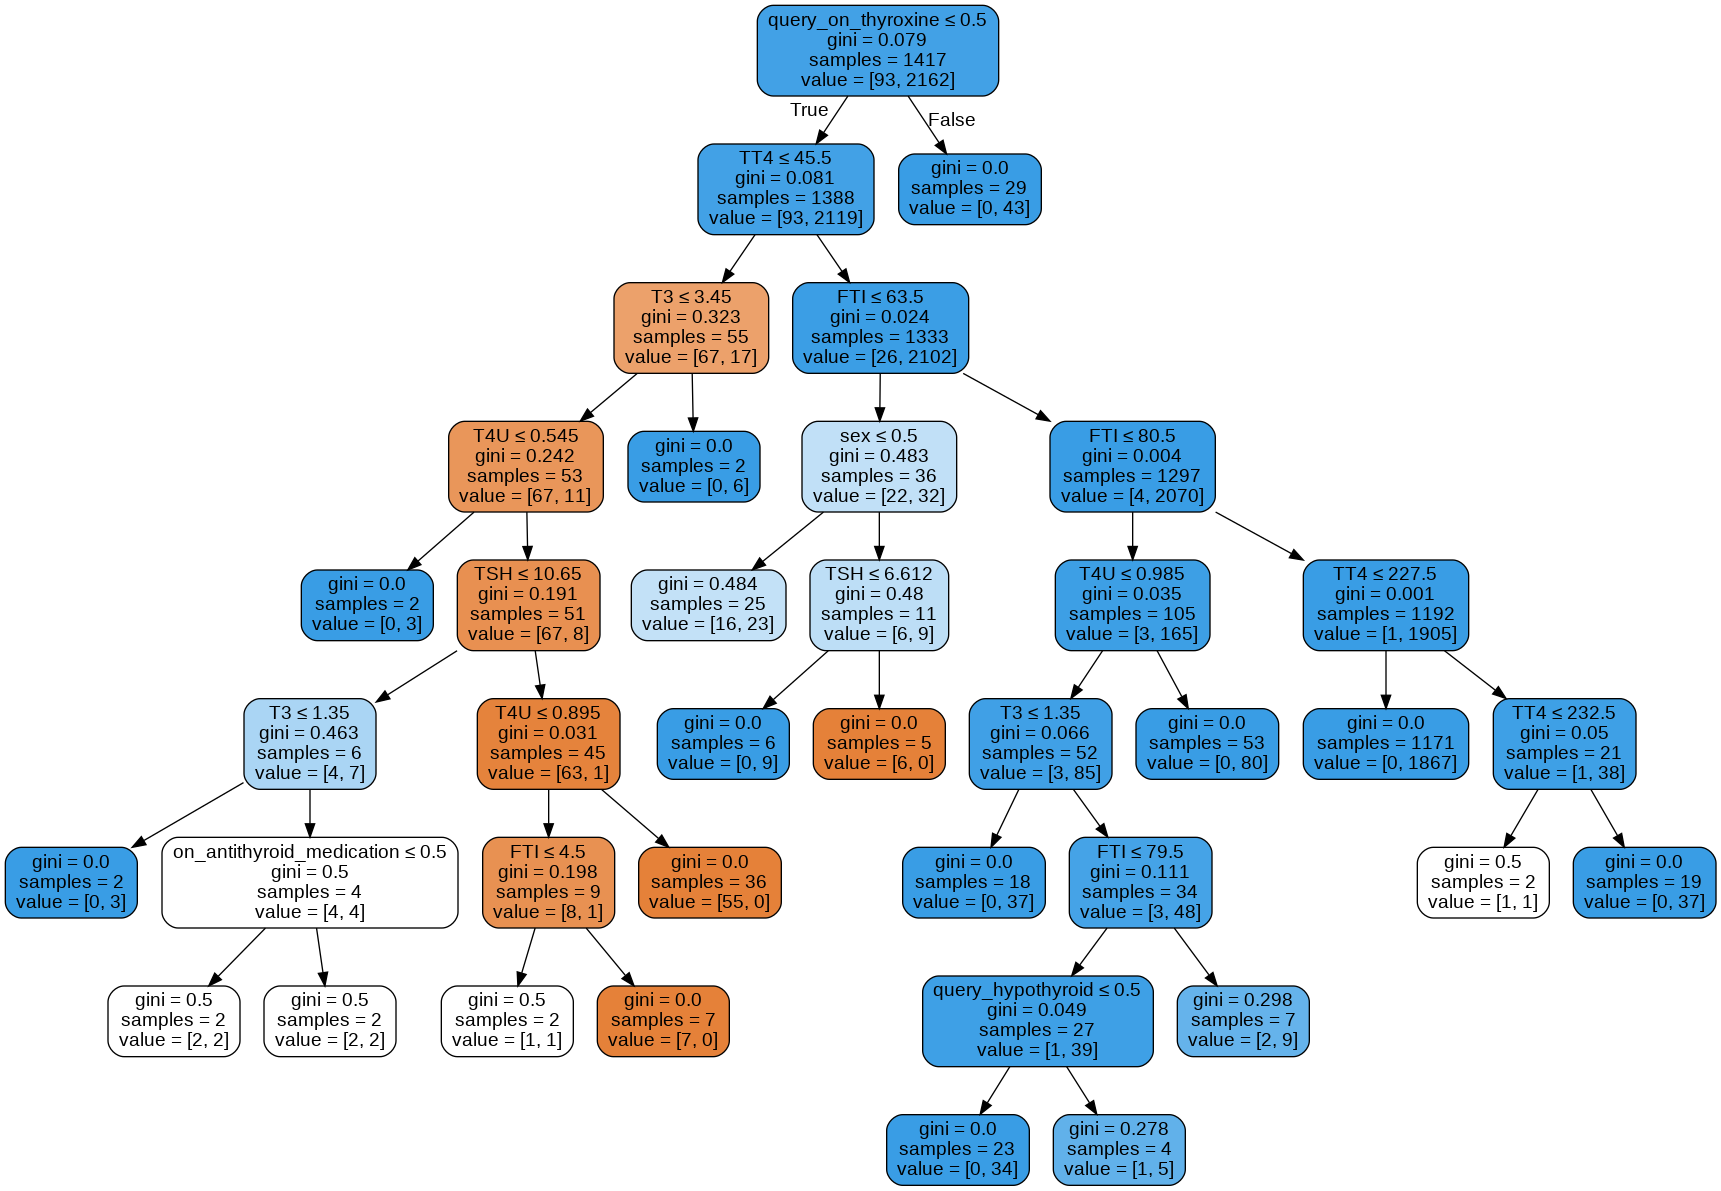

In [78]:
# Plotting the 15 random tree

dot_data = StringIO()
# pick a specific tree from the forest
tree = rf.estimators_[15]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = features)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

The random forest's 15th tree has included a couple of features that were not in the single decision tree and has query_on_thyroxine as the most important feature.

This will not be the case for all trees in random forest as they are all random

Random Forest gives an accuracy of 98%

Out of the 3 ensemble algorithms, Gradient boost performed the best with an accuracy of 98.5%. 

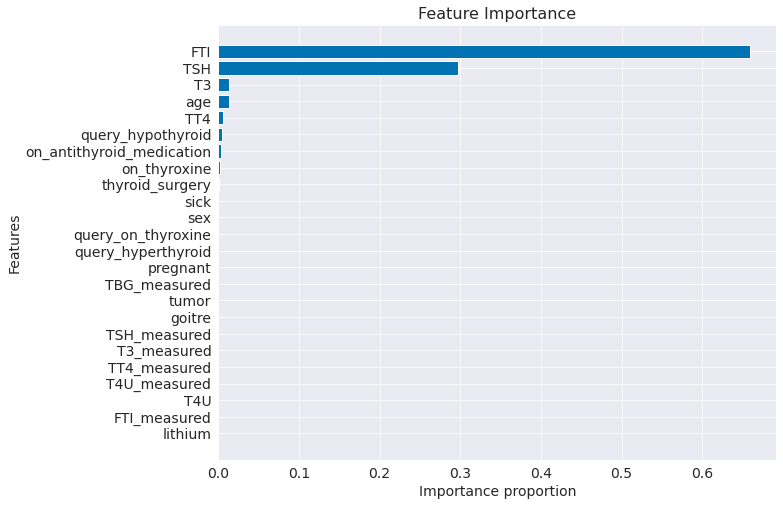

In [79]:
# Obtaining the most important features in the gradient boost model.

# To show feature importance

import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
#
# Get Feature importance data using feature_importances_ attribute
#
feature_importance = gbr.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(10, 8))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(features)[sorted_idx])
plt.title('Feature Importance', fontsize=16)
result = permutation_importance(gbr, X_test, y_test, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()
plt.xlabel('Importance proportion', fontsize = 14)
plt.ylabel('Features', fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

# FTI and TSH are the most important features in the prediction if one has hypothyroid or not in the case of gradient boosted trees

**Interpretation of the feature selection done**

Gini index, entropy and other indices are used for feature selection in decision trees. The most commonly used and most widely accepted is the Gini index. This is a measure of how often a randomly chosen element from the set would be incorrectly labeled.

The feature with the lowest Gini score is used as the root of the tree. The Gini coefficient tells us how impure a node is, that is how mixed up one category is with another.

In this case the most important feature is FTI in the gradient boosting model. This is shown also in the single decision tree created. This means that it has the lowest Gini score. FTI would help us identify one class over the other better than any other feature

###b) Support Vector Machine


In [80]:
# Splitting X and y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 66)

# Standardizing our X_train and X_test. Standardizing
# of features is extremely important in SVM. Variables with
# bigger magnitudes will be considered more important than those with smaller magnitudes which may lead to a wrong prediction.
# Bringing the values within the same range makes the model predictions more accurate.

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)


**Building model using the linear kernel**

In [81]:
# Building the linear model

linear = SVC(kernel= 'linear')

# Fitting the model

linear.fit(X_train_std, y_train)

# Making predictions

y_pred = linear.predict(X_test_std)

# Model Accuracy
print('Prediction accuracy:', accuracy_score(y_train, linear.predict(X_train_std)))
print('Test accuracy:', accuracy_score(y_test, y_pred))

# With the linear model without any hyperparameter tuning
# test accuracy is 97.7

Prediction accuracy: 0.9880266075388027
Test accuracy: 0.9773936170212766


In [82]:
# Hyperparameter tuning

param_grid = {'C': np.arange(1,10,1), 
              'gamma': np.arange(1,10, 1),
              'kernel' : ['linear']}

search = GridSearchCV(estimator = linear, param_grid = param_grid, cv = 5, scoring = 'accuracy')

In [83]:
# Getting the best parameters

search.fit(X_train_std, y_train)
print(search.best_params_)
print(search.best_score_)

{'C': 1, 'gamma': 1, 'kernel': 'linear'}
0.9853658536585366


In [84]:
# Building the linear model

linear = SVC(kernel= 'linear', C = 1 , gamma=1)

# Fitting the model

linear.fit(X_train_std, y_train)

# Making predictions

y_pred = linear.predict(X_test_std)

# Model Accuracy
print('Prediction accuracy:', accuracy_score(y_train, linear.predict(X_train_std)))
print('Test accuracy:', accuracy_score(y_test, y_pred))

# Still giving the same accuracy score as before

Prediction accuracy: 0.9880266075388027
Test accuracy: 0.9773936170212766


In [85]:
# Experimenting with other hyperparameters

linear = SVC(kernel= 'linear', C = 5 , gamma=5)

# Fitting the model

linear.fit(X_train_std, y_train)

# Making predictions

y_pred = linear.predict(X_test_std)

# Model Accuracy
print('Prediction accuracy:', accuracy_score(y_train, linear.predict(X_train_std)))
print('Test accuracy:', accuracy_score(y_test, y_pred))

# With a C and gamma equal to 5, The accuracy score rises to 97.8

Prediction accuracy: 0.9875831485587583
Test accuracy: 0.9787234042553191


**Building model with rbf kernel**

In [86]:
# Building the rbf model

rbf = SVC(kernel= 'rbf')

# Fitting the model

rbf.fit(X_train_std, y_train)

# Making predictions

y_pred = rbf.predict(X_test_std)

# Model Accuracy
print('Prediction accuracy:', accuracy_score(y_train, rbf.predict(X_train_std)))
print('Test accuracy:', accuracy_score(y_test, y_pred))

# With the rbf kernel, the accuracy came at 97.5%

Prediction accuracy: 0.9862527716186252
Test accuracy: 0.9747340425531915


In [87]:
# Hyperparameter tuning

param_grid = {'C': np.arange(1,10,1), 
              'gamma': np.arange(0,1,0.1),
              'kernel' : ['rbf']}

search = GridSearchCV(estimator = rbf, param_grid = param_grid, scoring = 'accuracy')

In [88]:
# Getting the best parameters

search.fit(X_train_std, y_train)
print(search.best_params_)
print(search.best_score_)

# The best parameters for this are C = 8 and gamma = 0.1
# Let us build a model with the new parameters and see

{'C': 8, 'gamma': 0.1, 'kernel': 'rbf'}
0.9804878048780488


In [89]:
# Building the rbf model using the recommended parameters

rbf = SVC(kernel= 'rbf', C = 8 , gamma=0.1)

# Fitting the model

rbf.fit(X_train_std, y_train)

# Making predictions

y_pred = rbf.predict(X_test_std)

# Model Accuracy
print('Prediction accuracy:', accuracy_score(y_train, rbf.predict(X_train_std)))
print('Test accuracy:', accuracy_score(y_test, y_pred))

# After tuning the parameters, the accuracy has risen from 97.4%
# to 97.7%

Prediction accuracy: 0.9964523281596452
Test accuracy: 0.9773936170212766


**Building a model using the polynomial kernel**

In [90]:
# Building the polynomial model

poly = SVC(kernel= 'poly')

# Fitting the model

poly.fit(X_train_std, y_train)

# Making predictions

y_pred = poly.predict(X_test_std)

# Model Accuracy
print('Prediction accuracy:', accuracy_score(y_train, poly.predict(X_train_std)))
print('Test accuracy:', accuracy_score(y_test, y_pred))

# Without hyperparameter tuning, the polynomial model gives
# An accuracy of 96.8%

Prediction accuracy: 0.9840354767184035
Test accuracy: 0.9680851063829787


In [91]:
# Hyper parameter tuning

param_grid = {'degree': np.arange(1,5,1), 
              'gamma': [1,0.1,0.01,0.001],
              'C': np.arange(1,10,1),
              'kernel' : ['poly']}

search = GridSearchCV(estimator = poly, param_grid = param_grid, scoring = 'accuracy')

In [92]:
# Getting the best parameters

search.fit(X_train_std, y_train)
print(search.best_params_)
print(search.best_score_)

{'C': 1, 'degree': 1, 'gamma': 1, 'kernel': 'poly'}
0.9853658536585366


In [93]:
# Building the polynomial model with the recommended parameters

poly = SVC(kernel= 'poly', C = 1 , gamma=1, degree=1)

# Fitting the model

poly.fit(X_train_std, y_train)

# Making predictions

y_pred = poly.predict(X_test_std)

# Model Accuracy
print('Prediction accuracy:', accuracy_score(y_train, poly.predict(X_train_std)))
print('Test accuracy:', accuracy_score(y_test, y_pred))

# With the degree as 1(linear), c=1 and gamma =1
# We get an accuracy of 97.73 just like the other 3 kernels

Prediction accuracy: 0.9880266075388027
Test accuracy: 0.9773936170212766


The SVM model with the highest accuracy is the one built using the linear kernel with C = 5 and gamma = 5. The model accuracy obtained was 97.8%

In [94]:
# Obtaining the features names used in SVM

feature_names = X.columns
feature_names

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4', 'T4U', 'FTI',
       'TBG_measured'],
      dtype='object')

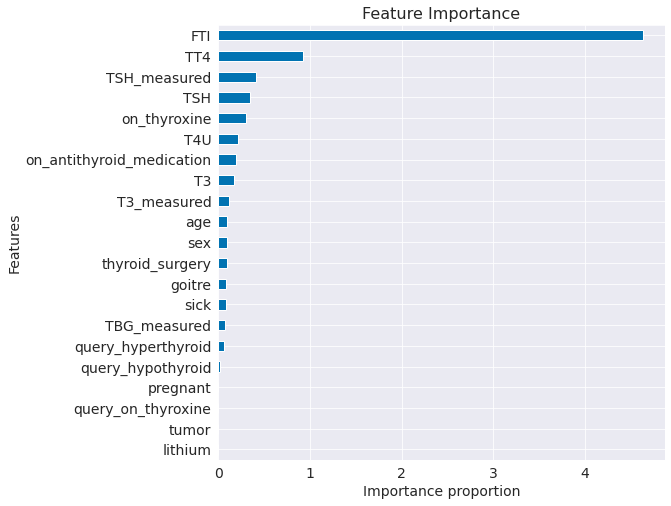

In [95]:
# Checking on the most important in the linear kernel model

plt.figure(figsize=(8,8))
pd.Series(abs(linear.coef_[0]), index=feature_names).sort_values().plot(kind='barh')
plt.title('Feature Importance', fontsize=16)
plt.xlabel('Importance proportion', fontsize = 14)
plt.ylabel('Features', fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

In [96]:
# Preprocessing

X_ln = hypo[['FTI', 'TT4', 'TSH_measured', 'TSH', 'on_thyroxine', 'T4U', 'on_antithyroid_medication', 'T3', 'T3_measured', 'age',
           'sex', 'thyroid_surgery']]

# Splitting X and y into train and test

X_train, X_test, y_train, y_test = train_test_split(X_ln, y, test_size = 0.25, random_state = 66)

# Standardizing our X_train and X_test

sc = StandardScaler()
X_train_stdln = sc.fit_transform(X_train)
X_test_stdln = sc.transform(X_test)


In [101]:
# Building the linear kernel model with most of the features

linear = SVC(kernel= 'linear', C = 5 , gamma=5)

# Fitting the model

linear.fit(X_train_stdln, y_train)

# Making predictions

y_pred = linear.predict(X_test_stdln)

# Model Accuracy
print('Prediction accuracy:', accuracy_score(y_train, linear.predict(X_train_stdln)))
print('Test accuracy:', accuracy_score(y_test, y_pred))

# The accuracy score is at 97.7

Prediction accuracy: 0.987139689578714
Test accuracy: 0.9773936170212766


In [102]:
# Using only two features with the linear kernel to see if they will give a higher accuracy
X_2 = hypo[['FTI', 'TT4']]


In [103]:
# Splitting again

X_train, X_test, y_train, y_test = train_test_split(X_2, y, test_size = 0.25, random_state = 66)

# Standardizing

X_train_std2 = sc.fit_transform(X_train)
X_test_std2 = sc.transform(X_test)

# Fitting the model
linear.fit(X_train_std2, y_train)

# Making predictions

y_pred = linear.predict(X_test_std2)

# Model Accuracy
print('Prediction accuracy:', accuracy_score(y_train, linear.predict(X_train_std2)))
print('Test accuracy:', accuracy_score(y_test, y_pred))

# With the 2 features only, the model did not do any better than before.
# The test accuracy dropped from 97.7% to 96.9%


Prediction accuracy: 0.9787139689578714
Test accuracy: 0.9694148936170213


## 9. Challenging the solution

- For comparison purposes, I would also attempt to build a model using Naive Bayes and K-Nearest Neighbours. This would give a better picture of which algorithm performs best for this problem.

- For hyperparameter tuning, I would attempt to use Bayesian Optimization technique. Using Grid search has proven computationally expensive especially in the case of building models using SVM.


## 10. Conclusion

Some of the conclusions that can be made from this project:

- Tree based algorithms have performed better overall than the SVM algorithms. The models built using the tree based algorithms all gave accuracies of 98% and above. With SVM, none of the models attained a 98% accuracy.
- Among the ensemble tree based algorithms, Gradient boosting had the highest accuracy at 98.5%.
- Among the SVM algorithms, the model built using the SVM linear kernel algorithm performed the best with an accuracy of 97.7%
- In both the ensemble methods models and the SVM models, FTI was the most important feature in predicting whether an individual has hypothyroidism or not.
- Using grid search for hyperparameter tuning especially in the case of SVM is not efficient. It takes a very long time to run and give a correct result. 
- The best algorithm to use would be the Gradient boost